### This notebook involves the Clustering of Restaurants based on CUISINES, SPECIAL DIETS, Meals, & FEATURES in the dataset.

>  **import required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

import requests
import json
import folium
import warnings
warnings.filterwarnings('ignore')

>  **Read the dataset**

In [ ]:
df  = pd.read_csv('../input/restaurants-dataset/RestaurantsFinalDataset_modified.csv')
df = df.dropna()
df = df.reset_index(drop=True)
df.head()

Name  \
0  Playtrix Sports Bar and Cafe   
1             King of the Mambo   
2                Sapphyr Lounge   
3                  Shang Palace   
4      The Ocean, The Kingsbury   

                                            Location  \
0  137 Sir James Pieris Mawatha Colombo City Cent...   
1          Galle Face Hotel, Colombo 00300 Sri Lanka   
2  02 No 01 Galle Face Shangri-La Hotel Colombo, ...   
3  02 1 Galle Face Shangri-La Hotel, Colombo 0020...   
4        48 Janadhipathi Mawatha,, Colombo Sri Lanka   

                                             Address             PRICE RANGE  \
0  Sir James Pieris Mawatha Colombo City Centre M...     LKR 500 - LKR 1,400   
1                    Galle Face Hotel, Colombo 00300  LKR 2,000 - LKR 30,000   
2  Galle Face Shangri-La Hotel Colombo, Colombo 0...   LKR 2,000 - LKR 5,000   
3        Galle Face Shangri-La Hotel, Colombo 00200   LKR 2,000 - LKR 30,000   
4                     Janadhipathi Mawatha,, Colombo    LKR 500 - LKR 30,000   

                                           CUISINES  \
0                   American, Gastropub, Sri Lankan   
1  Seafood, International, Grill, Cuban, Latin, Bar   
2                               Cafe, International   
3                                           Chinese   
4                        Seafood, Asian, Sri Lankan   

                                       SPECIAL DIETS  \
0                                Vegetarian Friendly   
1  Vegetarian Friendly, Vegan Options, Gluten Fre...   
2  Vegetarian Friendly, Vegan Options, Gluten Fre...   
3  Vegetarian Friendly, Vegan Options, Gluten Fre...   
4                                Gluten Free Options   

                              Meals  \
0         Lunch, Dinner, Late Night   
1             Lunch, Dinner, Brunch   
2  Breakfast, Lunch, Dinner, Drinks   
3                     Lunch, Dinner   
4         Lunch, Dinner, Late Night   

                                            FEATURES  \
0  Takeout, Reservations, Seating, Parking Availa...   
1  Reservations, Seating, Validated Parking, Serv...   
2  Reservations, Seating, Parking Available, Vali...   
3  Takeout, Reservations, Private Dining, Seating...   
4  Reservations, Seating, Parking Available, Vali...   

                                                Link  
0  https://www.tripadvisor.com/Restaurant_Review-...  
1  https://www.tripadvisor.com/Restaurant_Review-...  
2  https://www.tripadvisor.com/Restaurant_Review-...  
3  https://www.tripadvisor.com/Restaurant_Review-...  
4  https://www.tripadvisor.com/Restaurant_Review-...

In [ ]:
duplicates = df.duplicated(keep=False)
df = df[~duplicates]
df = df.reset_index(drop=True)
df.shape

(486, 9)

In [ ]:
lat = []
long = []
for i in range(0,len(df)):
  address = df.Address[i]
  response = requests.get("https://api.opencagedata.com/geocode/v1/json?q={}&key=8fa09a5e06e945c2ab88aa43b408f033".format(address))
  data = json.loads(response.text)
  try:
    lat_value = data['results'][0]['geometry']['lat']
    lng_value = data['results'][0]['geometry']['lng']
    lat.append(lat_value)
    long.append(lng_value)
  except:
    lat.append(np.nan)
    long.append(np.nan)

In [ ]:
# Add Latitude, & Longitude features to the dataframe
df['Latitude'] = lat
df['Longitude'] = long
df.head()

Name  \
0  Playtrix Sports Bar and Cafe   
1             King of the Mambo   
2                Sapphyr Lounge   
3                  Shang Palace   
4      The Ocean, The Kingsbury   

                                            Location  \
0  137 Sir James Pieris Mawatha Colombo City Cent...   
1          Galle Face Hotel, Colombo 00300 Sri Lanka   
2  02 No 01 Galle Face Shangri-La Hotel Colombo, ...   
3  02 1 Galle Face Shangri-La Hotel, Colombo 0020...   
4        48 Janadhipathi Mawatha,, Colombo Sri Lanka   

                                             Address             PRICE RANGE  \
0  Sir James Pieris Mawatha Colombo City Centre M...     LKR 500 - LKR 1,400   
1                    Galle Face Hotel, Colombo 00300  LKR 2,000 - LKR 30,000   
2  Galle Face Shangri-La Hotel Colombo, Colombo 0...   LKR 2,000 - LKR 5,000   
3        Galle Face Shangri-La Hotel, Colombo 00200   LKR 2,000 - LKR 30,000   
4                     Janadhipathi Mawatha,, Colombo    LKR 500 - LKR 30,000   

                                           CUISINES  \
0                   American, Gastropub, Sri Lankan   
1  Seafood, International, Grill, Cuban, Latin, Bar   
2                               Cafe, International   
3                                           Chinese   
4                        Seafood, Asian, Sri Lankan   

                                       SPECIAL DIETS  \
0                                Vegetarian Friendly   
1  Vegetarian Friendly, Vegan Options, Gluten Fre...   
2  Vegetarian Friendly, Vegan Options, Gluten Fre...   
3  Vegetarian Friendly, Vegan Options, Gluten Fre...   
4                                Gluten Free Options   

                              Meals  \
0         Lunch, Dinner, Late Night   
1             Lunch, Dinner, Brunch   
2  Breakfast, Lunch, Dinner, Drinks   
3                     Lunch, Dinner   
4         Lunch, Dinner, Late Night   

                                            FEATURES  \
0  Takeout, Reservations, Seating, Parking Availa...   
1  Reservations, Seating, Validated Parking, Serv...   
2  Reservations, Seating, Parking Available, Vali...   
3  Takeout, Reservations, Private Dining, Seating...   
4  Reservations, Seating, Parking Available, Vali...   

                                                Link  Latitude  Longitude  
0  https://www.tripadvisor.com/Restaurant_Review-...  6.916700  79.850000  
1  https://www.tripadvisor.com/Restaurant_Review-...  6.920301  79.846261  
2  https://www.tripadvisor.com/Restaurant_Review-...  6.916700  79.850000  
3  https://www.tripadvisor.com/Restaurant_Review-...  6.916700  79.850000  
4  https://www.tripadvisor.com/Restaurant_Review-...  6.935627  79.843084

In [ ]:
# Check df columns
df.columns

Index(['Name', 'Location', 'Address', 'PRICE RANGE', 'CUISINES',
       'SPECIAL DIETS', 'Meals', 'FEATURES', 'Link', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
df.shape

(486, 11)

In [ ]:
# Save pre-processed dataset in csv file
df.to_csv('Restaurants_preprocessed1.csv',index=False)

In [ ]:
df_new = pd.read_csv('Restaurants_preprocessed1.csv')
df_new

Name  \
0    Playtrix Sports Bar and Cafe   
1               King of the Mambo   
2                  Sapphyr Lounge   
3                    Shang Palace   
4        The Ocean, The Kingsbury   
..                            ...   
481             The Chaat Company   
482                    Malar Cafe   
483           Bombay Sweet Centre   
484        The Biryani Restaurant   
485           Grand Slam by Mitsi   

                                              Location  \
0    137 Sir James Pieris Mawatha Colombo City Cent...   
1            Galle Face Hotel, Colombo 00300 Sri Lanka   
2    02 No 01 Galle Face Shangri-La Hotel Colombo, ...   
3    02 1 Galle Face Shangri-La Hotel, Colombo 0020...   
4          48 Janadhipathi Mawatha,, Colombo Sri Lanka   
..                                                 ...   
481             5 Rohini Road, Colombo 00600 Sri Lanka   
482           Cww Kanangara Mawatha, Colombo Sri Lanka   
483                  161 Galle Road, Colombo Sri Lanka   
484    No 33 Armour Street Junction, Colombo Sri Lanka   
485  Sir Marcus Fernando Road, Colombo 00700 Sri Lanka   

                                               Address  \
0    Sir James Pieris Mawatha Colombo City Centre M...   
1                      Galle Face Hotel, Colombo 00300   
2    Galle Face Shangri-La Hotel Colombo, Colombo 0...   
3          Galle Face Shangri-La Hotel, Colombo 00200    
4                       Janadhipathi Mawatha,, Colombo   
..                                                 ...   
481                         Rohini Road, Colombo 00600   
482                     Cww Kanangara Mawatha, Colombo   
483                                Galle Road, Colombo   
484                    Armour Street Junction, Colombo   
485            Sir Marcus Fernando Road, Colombo 00700   

                PRICE RANGE  \
0       LKR 500 - LKR 1,400   
1    LKR 2,000 - LKR 30,000   
2     LKR 2,000 - LKR 5,000   
3    LKR 2,000 - LKR 30,000   
4      LKR 500 - LKR 30,000   
..                      ...   
481   LKR†1,500 - LKR†2,500   
482   LKR†1,500 - LKR†2,500   
483   LKR†1,500 - LKR†2,500   
484   LKR†1,500 - LKR†2,500   
485     LKR 750 - LKR 1,500   

                                              CUISINES  \
0                      American, Gastropub, Sri Lankan   
1     Seafood, International, Grill, Cuban, Latin, Bar   
2                                  Cafe, International   
3                                              Chinese   
4                           Seafood, Asian, Sri Lankan   
..                                                 ...   
481                          Indian, Asian, Sri Lankan   
482                                  Asian, Sri Lankan   
483                                  Asian, Sri Lankan   
484                                             Indian   
485  Italian, Bar, Pizza, Pub, Wine Bar, Beer resta...   

                                         SPECIAL DIETS  \
0                                  Vegetarian Friendly   
1    Vegetarian Friendly, Vegan Options, Gluten Fre...   
2    Vegetarian Friendly, Vegan Options, Gluten Fre...   
3    Vegetarian Friendly, Vegan Options, Gluten Fre...   
4                                  Gluten Free Options   
..                                                 ...   
481                 Vegetarian Friendly, Vegan Options   
482                 Vegetarian Friendly, Vegan Options   
483                 Vegetarian Friendly, Vegan Options   
484                 Vegetarian Friendly, Vegan Options   
485                 Vegetarian Friendly, Vegan Options   

                                Meals  \
0           Lunch, Dinner, Late Night   
1               Lunch, Dinner, Brunch   
2    Breakfast, Lunch, Dinner, Drinks   
3                       Lunch, Dinner   
4           Lunch, Dinner, Late Night   
..                                ...   
481                     Lunch, Dinner   
482                     Lunch, Dinner   
483                     Lunch, Dinner   
484          

> **Date pre-processing**

In [ ]:
# Strip white spaces & replace some words
df_new['FEATURES'] = df_new['FEATURES'].str.strip()
df_new['FEATURES'] = df_new['FEATURES'].str.replace('TTakeout','Takeout')
df_new['FEATURES'] = df_new['FEATURES'].str.replace('Takeout\nI','Takeout')
df_new['FEATURES'] = df_new['FEATURES'].str.replace('Waterfron','Waterfront')

In [ ]:
# Check null values
df_new.isnull().sum()

Name             0
Location         0
Address          0
PRICE RANGE      0
CUISINES         0
SPECIAL DIETS    0
Meals            0
FEATURES         0
Link             0
Latitude         0
Longitude        0
dtype: int64

> **Define a function to extract unique items from dataset features.**

In [ ]:
def unique_items(df):
  unique_list = []
  for i in df.unique():
    string_split = i.split(',')
    for j in string_split:
      if not j in unique_list:
        unique_list.append(j)
  unique_list = [x.strip(' ') for x in unique_list]
  unique_list =set(unique_list)
  unique_list = list(set(unique_list))
  return unique_list

In [ ]:
# Extract unique_cuisines
unique_cuisines = unique_items(df_new['CUISINES'])
unique_cuisines

['Chinese',
 'Arabic',
 'Mediterranean',
 'Contemporary',
 'Sri Lankan',
 'Mexican',
 'Lebanese',
 'Dining bars',
 'Cuban',
 'Beer restaurants',
 'Wine Bar',
 'Thai',
 'Latin',
 'Caribbean',
 'Afghani',
 'Sicilian',
 'Japanese',
 'Steakhouse',
 'Mongolian',
 'Vietnamese',
 'Pub',
 'Indian',
 'Moroccan',
 'Central European',
 'Cafe',
 'Fast Food',
 'Southwestern',
 'German',
 'Vegetarian Friendly',
 'Vegan Options',
 'Japanese Fusion',
 'Grill',
 'International',
 'Australian',
 'Central-Italian',
 'American',
 'Pakistani',
 'Healthy',
 'Spanish',
 'French',
 'Gastropub',
 'Bar',
 'Asian',
 'Italian',
 'Deli',
 'Street Food',
 'Gluten Free Options',
 'Cajun & Creole',
 'Polynesian',
 'Barbecue',
 'Irish',
 'Scottish',
 'Southern-Italian',
 'Fujian',
 'Fusion',
 'Malaysian',
 'African',
 'Portuguese',
 'Middle Eastern',
 'Turkish',
 'Pizza',
 'Indonesian',
 'Seafood',
 'British',
 'Sushi',
 'European',
 'Singaporean',
 'Diner',
 'Soups',
 'Korean']

In [ ]:
# Extract unique_features
unique_features = unique_items(df_new['FEATURES'])
unique_features

['Full Bar',
 'Free Wifi',
 'Validated Parking',
 'Gift Cards Available',
 'Non-smoking restaurants',
 'Beach',
 'Street Parking',
 'Live Music',
 'Takeout',
 'Serves Alcohol',
 'Waterfrontt',
 'Accepts Mastercard',
 'Waterfront',
 'Digital Payments',
 'Cash Only',
 'akeout',
 'Accepts Visa',
 'Wheelchair Accessible',
 'Free off-street parking',
 'Seating',
 'Dog Friendly',
 'Table Service',
 'Television',
 'Accepts American Express',
 'Buffet',
 'Highchairs Available',
 'Accepts Credit Cards',
 '有泊車位',
 'Wine and Beer',
 'Accepts Discover',
 'Delivery',
 'Jazz Bar',
 'Outdoor Seating',
 'Valet Parking',
 'Reservations',
 'Family style',
 'Parking Available',
 'BYOB',
 'Private Dining']

In [ ]:
# Extract unique_specialdiets
unique_specialdiets = unique_items(df_new['SPECIAL DIETS'])
unique_specialdiets

['Vegetarian Friendly',
 'Vegan Options',
 'nonVeg',
 'Halal',
 'Nonveg',
 'Kosher',
 'Gluten Free Options']

In [ ]:
# Extract unique_meals
unique_meals = unique_items(df_new['Meals'])
unique_meals

['Table Service',
 'Takeout',
 'Lunch',
 'Drinks',
 'Breakfast',
 'Brunch',
 'Dinner',
 'Seating',
 'Late Night']

In [ ]:
# create a column for each cuisine in unique_cuisines. If cuisine is present in the cuisines feature it will return 1 else 0 like one hot coding
for cuisine in unique_cuisines:
    df_new.loc[df_new['CUISINES'].str.contains(cuisine,regex=True), cuisine] = 1
    df_new.loc[~df_new['CUISINES'].str.contains(cuisine,regex=True), cuisine] = 0
    df_new[cuisine] = df_new[cuisine].astype('uint8')

In [ ]:
# create a column for each feature in unique_features. If feature is present in the FEATURES column it will return 1 else 0 like one hot coding
for feature in unique_features:
    df_new.loc[df_new['FEATURES'].str.contains(feature,regex=True), feature] = 1
    df_new.loc[~df_new['FEATURES'].str.contains(feature,regex=True), feature] = 0
    df_new[feature] = df_new[feature].astype('uint8')

In [ ]:
# create a column for each specialdiet in unique_specialdiets. If specialdiet is present in the SPECIAL DIETS column it will return 1 else 0 like one hot coding
for sd in unique_specialdiets:
    df_new.loc[df_new['SPECIAL DIETS'].str.contains(sd,regex=True), sd] = 1
    df_new.loc[~df_new['SPECIAL DIETS'].str.contains(sd,regex=True), sd] = 0
    df_new[sd] = df_new[sd].astype('uint8')

In [ ]:
# create a column for each meal in unique_meals. If meal is present in the MEALS column it will return 1 else 0 like one hot coding
for meal in unique_meals:
    df_new.loc[df_new['Meals'].str.contains(meal,regex=True), meal] = 1
    df_new.loc[~df_new['Meals'].str.contains(meal,regex=True), meal] = 0
    df_new[meal] = df_new[meal].astype('uint8')

In [ ]:
df_new.head()

Name  \
0  Playtrix Sports Bar and Cafe   
1             King of the Mambo   
2                Sapphyr Lounge   
3                  Shang Palace   
4      The Ocean, The Kingsbury   

                                            Location  \
0  137 Sir James Pieris Mawatha Colombo City Cent...   
1          Galle Face Hotel, Colombo 00300 Sri Lanka   
2  02 No 01 Galle Face Shangri-La Hotel Colombo, ...   
3  02 1 Galle Face Shangri-La Hotel, Colombo 0020...   
4        48 Janadhipathi Mawatha,, Colombo Sri Lanka   

                                             Address             PRICE RANGE  \
0  Sir James Pieris Mawatha Colombo City Centre M...     LKR 500 - LKR 1,400   
1                    Galle Face Hotel, Colombo 00300  LKR 2,000 - LKR 30,000   
2  Galle Face Shangri-La Hotel Colombo, Colombo 0...   LKR 2,000 - LKR 5,000   
3        Galle Face Shangri-La Hotel, Colombo 00200   LKR 2,000 - LKR 30,000   
4                     Janadhipathi Mawatha,, Colombo    LKR 500 - LKR 30,000   

                                           CUISINES  \
0                   American, Gastropub, Sri Lankan   
1  Seafood, International, Grill, Cuban, Latin, Bar   
2                               Cafe, International   
3                                           Chinese   
4                        Seafood, Asian, Sri Lankan   

                                       SPECIAL DIETS  \
0                                Vegetarian Friendly   
1  Vegetarian Friendly, Vegan Options, Gluten Fre...   
2  Vegetarian Friendly, Vegan Options, Gluten Fre...   
3  Vegetarian Friendly, Vegan Options, Gluten Fre...   
4                                Gluten Free Options   

                              Meals  \
0         Lunch, Dinner, Late Night   
1             Lunch, Dinner, Brunch   
2  Breakfast, Lunch, Dinner, Drinks   
3                     Lunch, Dinner   
4         Lunch, Dinner, Late Night   

                                            FEATURES  \
0  Takeout, Reservations, Seating, Parking Availa...   
1  Reservations, Seating, Validated Parking, Serv...   
2  Reservations, Seating, Parking Available, Vali...   
3  Takeout, Reservations, Private Dining, Seating...   
4  Reservations, Seating, Parking Available, Vali...   

                                                Link  Latitude  ...  nonVeg  \
0  https://www.tripadvisor.com/Restaurant_Review-...  6.916700  ...       0   
1  https://www.tripadvisor.com/Restaurant_Review-...  6.920301  ...       0   
2  https://www.tripadvisor.com/Restaurant_Review-...  6.916700  ...       0   
3  https://www.tripadvisor.com/Restaurant_Review-...  6.916700  ...       0   
4  https://www.tripadvisor.com/Restaurant_Review-...  6.935627  ...       0   

   Halal  Nonveg  Kosher  Lunch  Drinks  Breakfast  Brunch  Dinner  Late Night  
0      0       0       0      1       0          0       0       1           1  
1      0       0       0      1       0          0       1       1           0  
2      0       0       0      1       1          1       0       1           0  
3      0       0       0      1       0          0       0       1           0  
4      0       0       0      1       0          0       0       1           1  

[5 rows x 130 columns]

In [ ]:
# Apply one-hot coding to PRICE RANGE column
df_new = pd.get_dummies(df_new,columns=['PRICE RANGE'])

In [ ]:
df_new.head()

Name  \
0  Playtrix Sports Bar and Cafe   
1             King of the Mambo   
2                Sapphyr Lounge   
3                  Shang Palace   
4      The Ocean, The Kingsbury   

                                            Location  \
0  137 Sir James Pieris Mawatha Colombo City Cent...   
1          Galle Face Hotel, Colombo 00300 Sri Lanka   
2  02 No 01 Galle Face Shangri-La Hotel Colombo, ...   
3  02 1 Galle Face Shangri-La Hotel, Colombo 0020...   
4        48 Janadhipathi Mawatha,, Colombo Sri Lanka   

                                             Address  \
0  Sir James Pieris Mawatha Colombo City Centre M...   
1                    Galle Face Hotel, Colombo 00300   
2  Galle Face Shangri-La Hotel Colombo, Colombo 0...   
3        Galle Face Shangri-La Hotel, Colombo 00200    
4                     Janadhipathi Mawatha,, Colombo   

                                           CUISINES  \
0                   American, Gastropub, Sri Lankan   
1  Seafood, International, Grill, Cuban, Latin, Bar   
2                               Cafe, International   
3                                           Chinese   
4                        Seafood, Asian, Sri Lankan   

                                       SPECIAL DIETS  \
0                                Vegetarian Friendly   
1  Vegetarian Friendly, Vegan Options, Gluten Fre...   
2  Vegetarian Friendly, Vegan Options, Gluten Fre...   
3  Vegetarian Friendly, Vegan Options, Gluten Fre...   
4                                Gluten Free Options   

                              Meals  \
0         Lunch, Dinner, Late Night   
1             Lunch, Dinner, Brunch   
2  Breakfast, Lunch, Dinner, Drinks   
3                     Lunch, Dinner   
4         Lunch, Dinner, Late Night   

                                            FEATURES  \
0  Takeout, Reservations, Seating, Parking Availa...   
1  Reservations, Seating, Validated Parking, Serv...   
2  Reservations, Seating, Parking Available, Vali...   
3  Takeout, Reservations, Private Dining, Seating...   
4  Reservations, Seating, Parking Available, Vali...   

                                                Link  Latitude  Longitude  \
0  https://www.tripadvisor.com/Restaurant_Review-...  6.916700  79.850000   
1  https://www.tripadvisor.com/Restaurant_Review-...  6.920301  79.846261   
2  https://www.tripadvisor.com/Restaurant_Review-...  6.916700  79.850000   
3  https://www.tripadvisor.com/Restaurant_Review-...  6.916700  79.850000   
4  https://www.tripadvisor.com/Restaurant_Review-...  6.935627  79.843084   

   ...  PRICE RANGE_LKR†90 - LKR†2,000  PRICE RANGE_LKR†900 - LKR†1,500  \
0  ...                               0                                0   
1  ...                               0                                0   
2  ...                               0                                0   
3  ...                               0                                0   
4  ...                               0                                0   

   PRICE RANGE_LKR†900 - LKR†2,000  PRICE RANGE_LKR†950 - LKR†1,500  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   PRICE RANGE_LKR†98,912 - LKR†989,120  PRICE RANGE_LKR†989 - LKR†1,978  \
0                                     0                                0   
1                                     0                                0   
2                                     0                                0   
3                                     0                                0   
4                                     0                                0   

   PRICE RANGE_LKR†989 - LKR†2,967  PRICE RANGE_LKR†989 - LKR†5,935  \
0                                

In [ ]:
df_new.shape

(486, 307)

In [ ]:
# Save pre-processed data
df_new.to_csv('Restaurants_preprocessed.csv',index=False)

In [ ]:
# Drop columns which are not required for clustering
drop_cols = df_new.columns[:8]
df_final = df_new.drop(drop_cols,axis=1)
df_final = df_final.drop(['Latitude','Longitude'],axis=1)
df_final.head()

Chinese  Arabic  Mediterranean  Contemporary  Sri Lankan  Mexican  \
0        0       0              0             0           1        0   
1        0       0              0             0           0        0   
2        0       0              0             0           0        0   
3        1       0              0             0           0        0   
4        0       0              0             0           1        0   

   Lebanese  Dining bars  Cuban  Beer restaurants  ...  \
0         0            0      0                 0  ...   
1         0            0      1                 0  ...   
2         0            0      0                 0  ...   
3         0            0      0                 0  ...   
4         0            0      0                 0  ...   

   PRICE RANGE_LKR†90 - LKR†2,000  PRICE RANGE_LKR†900 - LKR†1,500  \
0                               0                                0   
1                               0                                0   
2                               0                                0   
3                               0                                0   
4                               0                                0   

   PRICE RANGE_LKR†900 - LKR†2,000  PRICE RANGE_LKR†950 - LKR†1,500  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   PRICE RANGE_LKR†98,912 - LKR†989,120  PRICE RANGE_LKR†989 - LKR†1,978  \
0                                     0                                0   
1                                     0                                0   
2                                     0                                0   
3                                     0                                0   
4                                     0                                0   

   PRICE RANGE_LKR†989 - LKR†2,967  PRICE RANGE_LKR†989 - LKR†5,935  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   PRICE RANGE_LKR†989 - LKR†7,913  PRICE RANGE_LKR†99 - LKR†999  
0                                0                             0  
1                                0                             0  
2                                0                             0  
3                                0                             0  
4                                0                             0  

[5 rows x 297 columns]

In [ ]:
df_final.shape

(486, 297)

### K-Means Clustering

### Elbow method for choosing optimum number of clusters

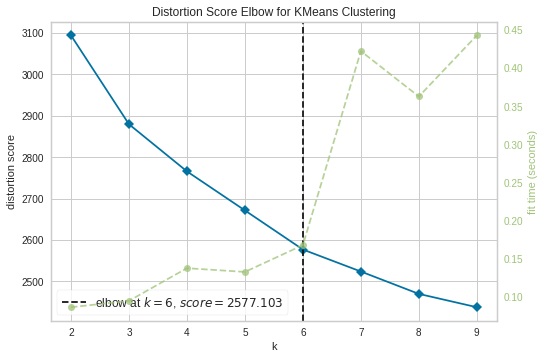

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans(random_state = 42)
visualizer = KElbowVisualizer(model, k=(2,10))
# Fit the data to the visualizer
visualizer.fit(df_final.values)
# Finalize and render the figure
visualizer.show() 

In [ ]:
%%time
# Initialize the K-means
kmeans_model = KMeans(n_clusters=6,random_state=42)
# Fit & predict the clusters
y_pred_cluster=kmeans_model.fit_predict(df_final)

CPU times: user 699 ms, sys: 460 ms, total: 1.16 s
Wall time: 299 ms


> **Frequency of K-Means Clusters**

Text(0, 0.5, 'Cluster labels')

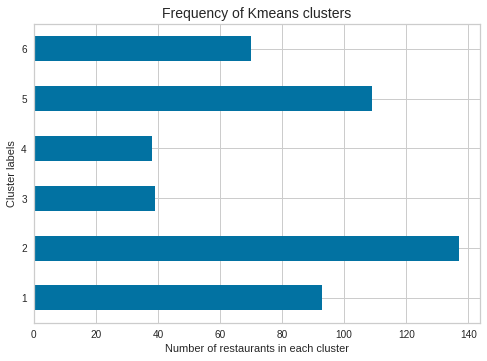

In [ ]:
df_kmeans = df_new
df_kmeans["cluster"] = y_pred_cluster+1
df_kmeans.cluster.value_counts().sort_index().plot.barh()
plt.title("Frequency of Kmeans clusters", fontsize = 14)
plt.xlabel("Number of restaurants in each cluster")
plt.ylabel("Cluster labels")

In [ ]:
df_kmeans.head()

Name  \
0  Playtrix Sports Bar and Cafe   
1             King of the Mambo   
2                Sapphyr Lounge   
3                  Shang Palace   
4      The Ocean, The Kingsbury   

                                            Location  \
0  137 Sir James Pieris Mawatha Colombo City Cent...   
1          Galle Face Hotel, Colombo 00300 Sri Lanka   
2  02 No 01 Galle Face Shangri-La Hotel Colombo, ...   
3  02 1 Galle Face Shangri-La Hotel, Colombo 0020...   
4        48 Janadhipathi Mawatha,, Colombo Sri Lanka   

                                             Address  \
0  Sir James Pieris Mawatha Colombo City Centre M...   
1                    Galle Face Hotel, Colombo 00300   
2  Galle Face Shangri-La Hotel Colombo, Colombo 0...   
3        Galle Face Shangri-La Hotel, Colombo 00200    
4                     Janadhipathi Mawatha,, Colombo   

                                           CUISINES  \
0                   American, Gastropub, Sri Lankan   
1  Seafood, International, Grill, Cuban, Latin, Bar   
2                               Cafe, International   
3                                           Chinese   
4                        Seafood, Asian, Sri Lankan   

                                       SPECIAL DIETS  \
0                                Vegetarian Friendly   
1  Vegetarian Friendly, Vegan Options, Gluten Fre...   
2  Vegetarian Friendly, Vegan Options, Gluten Fre...   
3  Vegetarian Friendly, Vegan Options, Gluten Fre...   
4                                Gluten Free Options   

                              Meals  \
0         Lunch, Dinner, Late Night   
1             Lunch, Dinner, Brunch   
2  Breakfast, Lunch, Dinner, Drinks   
3                     Lunch, Dinner   
4         Lunch, Dinner, Late Night   

                                            FEATURES  \
0  Takeout, Reservations, Seating, Parking Availa...   
1  Reservations, Seating, Validated Parking, Serv...   
2  Reservations, Seating, Parking Available, Vali...   
3  Takeout, Reservations, Private Dining, Seating...   
4  Reservations, Seating, Parking Available, Vali...   

                                                Link  Latitude  Longitude  \
0  https://www.tripadvisor.com/Restaurant_Review-...  6.916700  79.850000   
1  https://www.tripadvisor.com/Restaurant_Review-...  6.920301  79.846261   
2  https://www.tripadvisor.com/Restaurant_Review-...  6.916700  79.850000   
3  https://www.tripadvisor.com/Restaurant_Review-...  6.916700  79.850000   
4  https://www.tripadvisor.com/Restaurant_Review-...  6.935627  79.843084   

   ...  PRICE RANGE_LKR†900 - LKR†1,500  PRICE RANGE_LKR†900 - LKR†2,000  \
0  ...                                0                                0   
1  ...                                0                                0   
2  ...                                0                                0   
3  ...                                0                                0   
4  ...                                0                                0   

   PRICE RANGE_LKR†950 - LKR†1,500  PRICE RANGE_LKR†98,912 - LKR†989,120  \
0                                0                                     0   
1                                0                                     0   
2                                0                                     0   
3                                0                                     0   
4                                0                                     0   

   PRICE RANGE_LKR†989 - LKR†1,978  PRICE RANGE_LKR†989 - LKR†2,967  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   PRICE RANGE_LKR†989 - LKR†5,935  PRICE RANGE_LKR†989 - LKR†7,913  \
0                          

>  **K-means Clustering analysis**

In [ ]:
# Create a dataframe for each cluster
df1_kmeans = df_kmeans[df_kmeans['cluster']==1].reset_index(drop=True)
df2_kmeans = df_kmeans[df_kmeans['cluster']==2].reset_index(drop=True)
df3_kmeans = df_kmeans[df_kmeans['cluster']==3].reset_index(drop=True)
df4_kmeans = df_kmeans[df_kmeans['cluster']==4].reset_index(drop=True)
df5_kmeans = df_kmeans[df_kmeans['cluster']==5].reset_index(drop=True)
df6_kmeans = df_kmeans[df_kmeans['cluster']==6].reset_index(drop=True)

Text(0, 0.5, 'Number of restaurants')

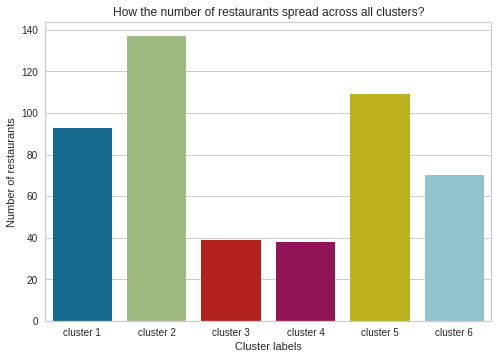

In [ ]:
# How the number of restaurants spread across all clusters
no_restaurants = [len(df1_kmeans),len(df2_kmeans),len(df3_kmeans),len(df4_kmeans),len(df5_kmeans),len(df6_kmeans)]
cluster_labels = ['cluster 1','cluster 2','cluster 3', 'cluster 4','cluster 5','cluster 6']
sns.barplot(x=cluster_labels,y=no_restaurants)
plt.title('How the number of restaurants spread across all clusters?')
plt.xlabel('Cluster labels')
plt.ylabel('Number of restaurants')

Let's check the which are the restaurants in which cluster.

In [ ]:
df1_kmeans

Name  \
0                   Plus Nine Four   
1             Ramen Misoya Colombo   
2                        Yue Chuan   
3                          Epicure   
4     Chambers At Park Street Mews   
..                             ...   
88                      Chopsticks   
89  Baked - Dessert & Coffee House   
90                  Kang's Kitchen   
91          The Biryani Restaurant   
92             Grand Slam by Mitsi   

                                             Location  \
0        35 D S Fonseka Road, Colombo 00500 Sri Lanka   
1   Reid Avenue Race Course Promenade, Colombo 000...   
2    48 Janadhipathi Mawatha, Colombo 00100 Sri Lanka   
3   7 65 B Gregory's Road, Colombo Next door to th...   
4        48 D, Park Street D, Colombo 00200 Sri Lanka   
..                                                ...   
88      317/1, Nawala Road, Nawala, Colombo Sri Lanka   
89          37A Elibank Road, Colombo 00500 Sri Lanka   
90     28/1 Horton Place Colombo 7, Colombo Sri Lanka   
91    No 33 Armour Street Junction, Colombo Sri Lanka   
92  Sir Marcus Fernando Road, Colombo 00700 Sri Lanka   

                                              Address  \
0                    D S Fonseka Road, Colombo 00500    
1   Reid Avenue Race Course Promenade, Colombo 00000    
2                 Janadhipathi Mawatha, Colombo 00100   
3   B Gregory's Road, Colombo Next door to the Swi...   
4                    D, Park Street D, Colombo 00200    
..                                                ...   
88                       Nawala Road, Nawala, Colombo   
89                        Elibank Road, Colombo 00500   
90                   Horton Place Colombo 7, Colombo    
91                    Armour Street Junction, Colombo   
92            Sir Marcus Fernando Road, Colombo 00700   

                                             CUISINES  \
0                                        Cafe, Fusion   
1                                     Japanese, Asian   
2                                      Chinese, Asian   
3         Contemporary, Healthy, International, Grill   
4          Lebanese, Moroccan, Middle Eastern, Arabic   
..                                                ...   
88                                     Chinese, Asian   
89                       Italian, Southwestern, Asian   
90                              Asian, Korean, Fusion   
91                                             Indian   
92  Italian, Bar, Pizza, Pub, Wine Bar, Beer resta...   

                                        SPECIAL DIETS  \
0   Vegetarian Friendly, Vegan Options, Gluten Fre...   
1                  Vegetarian Friendly, Vegan Options   
2                                 Vegetarian Friendly   
3   Vegetarian Friendly, Vegan Options, Gluten Fre...   
4           Vegetarian Friendly, Vegan Options, Halal   
..                                                ...   
88                 Vegetarian Friendly, Vegan Options   
89                 Vegetarian Friendly, Vegan Options   
90                 Vegetarian Friendly, Vegan Options   
91                 Vegetarian Friendly, Vegan Options   
92                 Vegetarian Friendly, Vegan Options   

                                Meals  \
0            Breakfast, Lunch, Brunch   
1                       Lunch, Dinner   
2                       Lunch, Dinner   
3   Lunch, Dinner, Brunch, Late Night   
4                       Lunch, Dinner   
..                                ...   
88                      Dinner, Lunch   
89           Breakfast, Lunch, Dinner   
90                      Lunch, Dinner   
91                      Lunch, Dinner   
92      Lunch, Dinner, Brunch, Drinks   

                                             FEATURES  \
0   Takeout, Outdoor Seating, Seating, Table Servi...   
1   Takeout, Reservations, Parking Available, Free...   
2   Reservations, Private Dining, Seating, Validat...   
3   Reservations, Seating, Street Parking, Free of...   
4   Takeout, Reservations, Seating, Accepts Credit...  

In [ ]:
# Check cluster 1 features
df1_kmeans[['Name','CUISINES','SPECIAL DIETS','Meals','FEATURES']]

Name  \
0                   Plus Nine Four   
1             Ramen Misoya Colombo   
2                        Yue Chuan   
3                          Epicure   
4     Chambers At Park Street Mews   
..                             ...   
88                      Chopsticks   
89  Baked - Dessert & Coffee House   
90                  Kang's Kitchen   
91          The Biryani Restaurant   
92             Grand Slam by Mitsi   

                                             CUISINES  \
0                                        Cafe, Fusion   
1                                     Japanese, Asian   
2                                      Chinese, Asian   
3         Contemporary, Healthy, International, Grill   
4          Lebanese, Moroccan, Middle Eastern, Arabic   
..                                                ...   
88                                     Chinese, Asian   
89                       Italian, Southwestern, Asian   
90                              Asian, Korean, Fusion   
91                                             Indian   
92  Italian, Bar, Pizza, Pub, Wine Bar, Beer resta...   

                                        SPECIAL DIETS  \
0   Vegetarian Friendly, Vegan Options, Gluten Fre...   
1                  Vegetarian Friendly, Vegan Options   
2                                 Vegetarian Friendly   
3   Vegetarian Friendly, Vegan Options, Gluten Fre...   
4           Vegetarian Friendly, Vegan Options, Halal   
..                                                ...   
88                 Vegetarian Friendly, Vegan Options   
89                 Vegetarian Friendly, Vegan Options   
90                 Vegetarian Friendly, Vegan Options   
91                 Vegetarian Friendly, Vegan Options   
92                 Vegetarian Friendly, Vegan Options   

                                Meals  \
0            Breakfast, Lunch, Brunch   
1                       Lunch, Dinner   
2                       Lunch, Dinner   
3   Lunch, Dinner, Brunch, Late Night   
4                       Lunch, Dinner   
..                                ...   
88                      Dinner, Lunch   
89           Breakfast, Lunch, Dinner   
90                      Lunch, Dinner   
91                      Lunch, Dinner   
92      Lunch, Dinner, Brunch, Drinks   

                                             FEATURES  
0   Takeout, Outdoor Seating, Seating, Table Servi...  
1   Takeout, Reservations, Parking Available, Free...  
2   Reservations, Private Dining, Seating, Validat...  
3   Reservations, Seating, Street Parking, Free of...  
4   Takeout, Reservations, Seating, Accepts Credit...  
..                                                ...  
88  Takeout, Seating, Serves Alcohol, Delivery, Re...  
89               Seating, Reservations, Table Service  
90  Delivery, Takeout, Reservations, Private Dinin...  
91  Delivery, Takeout, Reservations, Private Dinin...  
92  Delivery, Takeout, Reservations, Private Dinin...  

[93 rows x 5 columns]

In [ ]:
# Check cluster 2 features
df2_kmeans[['Name','CUISINES','SPECIAL DIETS','Meals','FEATURES']]

Name  \
0    The t-Lounge on Chatham Street by Dilmah   
1                                   Life Food   
2                                     Geek HQ   
3                               Dao Krua Thai   
4                                Kiku Colombo   
..                                        ...   
132                             The Foodcycle   
133                               Grill House   
134                         Bombay Sweet Mart   
135                         Kinjou Restaurant   
136                                Bellissimo   

                                    CUISINES  \
0                                       Cafe   
1                      Fusion, Healthy, Cafe   
2    Chinese, Japanese, American, Sri Lankan   
3                                Thai, Asian   
4           Japanese, European, Fusion, Cafe   
..                                       ...   
132                                     Cafe   
133                                 Barbecue   
134                                   Indian   
135                 Chinese, Asian, Japanese   
136      Italian, American, Fast Food, Asian   

                                         SPECIAL DIETS  \
0                                  Vegetarian Friendly   
1    Vegetarian Friendly, Vegan Options, Gluten Fre...   
2                                  Vegetarian Friendly   
3                   Vegetarian Friendly, Vegan Options   
4                   Vegetarian Friendly, Vegan Options   
..                                                 ...   
132                 Vegetarian Friendly, Vegan Options   
133                 Vegetarian Friendly, Vegan Options   
134                 Vegetarian Friendly, Vegan Options   
135                 Vegetarian Friendly, Vegan Options   
136                 Vegetarian Friendly, Vegan Options   

                               Meals  \
0           Breakfast, Lunch, Brunch   
1    Takeout, Seating, Table Service   
2                      Lunch, Dinner   
3                      Lunch, Dinner   
4           Lunch, Breakfast, Dinner   
..                               ...   
132                    Lunch, Dinner   
133                    Lunch, Dinner   
134                    Lunch, Dinner   
135                    Lunch, Dinner   
136         Breakfast, Lunch, Dinner   

                                         FEATURES  
0               Seating, Free Wifi, Table Service  
1                 Takeout, Seating, Table Service  
2                 Takeout, Seating, Table Service  
3                 Seating, Table Service, Takeout  
4    Seating, Accepts Credit Cards, Table Service  
..                                            ...  
132                        Seating, Table Service  
133                        Seating, Table Service  
134                        Seating, Table Service  
135                        Seating, Table Service  
136                        Seating, Table Service  

[137 rows x 5 columns]

In [ ]:
 # Check cluster 3 features
df3_kmeans[['Name','CUISINES','SPECIAL DIETS','Meals','FEATURES']]

Name  \
0                      Oak Ray Flower Drum Restaurant   
1                                                Isso   
2                                          Cafe Shaze   
3                                        Dolce Italia   
4                           Calorie Counter Colombo 7   
5                                          The Sizzle   
6                                     Arabian Knights   
7                                 Milk and Honey Cafe   
8                                      The VoV (VoV7)   
9                                 Michaelangelo Pizza   
10                                         Tea Breeze   
11                                       Peach Valley   
12                             London House of Coffee   
13                                     Paan Paan Cafe   
14                                            Pebbles   
15                      Okra Kitchen by Ravi & Sepali   
16                         Mintage Restaurant and Pub   
17                                 Light House Galley   
18                                       TGI Friday's   
19                              Cloud9 Rooftop Lounge   
20                                          Choco Luv   
21  Singhalease Sports Club - Restautant, Bar and ...   
22                                            Flavors   
23                       Playtrix Sports Bar and Cafe   
24                                 Zylan Luxury Villa   
25                       Indo Ceylon Cafe & Dosa King   
26                          Fazly's Halal Refreshment   
27                           Shiwu Chinese Restaurant   
28                         Navayuga Indian Restaurant   
29                                        Spice Coast   
30                             RAMEN HAMAKAZE Colombo   
31                                          Sushi Bar   
32                                        The Embazzy   
33                    Crossroads  Café and Restaurant   
34                           The Gardenia Coffee Shop   
35                                         La Veranda   
36                           3Brothers Italian Bistro   
37                                          Fat Panda   
38                             TosakanthíS Rosat Paan   

                                             CUISINES  \
0                              Chinese, Asian, Fusion   
1                          Seafood, Asian, Sri Lankan   
2                                  American, European   
3                                       Italian, Cafe   
4                       International, Grill, Healthy   
5                                              Indian   
6                            Middle Eastern, Lebanese   
7                                                Cafe   
8   Italian, American, Cafe, Asian, Diner, Sri Lankan   
9                                      Pizza, Italian   
10                                               Cafe   
11                                     Chinese, Asian   
12                                               Cafe   
13                                               Deli   
14                               Cafe, Fast Food, Pub   
15                                  Asian, Sri Lankan   
16                           Chinese, Bar, Asian, Pub   
17                                Chinese, Sri Lankan   
18                          American, Steakhouse, Bar   
19               Bar, Barbecue, Fusion, Wine Bar, Pub   
20                                    Cafe, Fast Food   
21                                           Bar, Pub   
22                                             Indian   
23                    American, Gastropub, Sri Lankan   
24                             Japanese, Asian, Sushi   
25                                 Indian, Sri Lankan   
26                                          Fast Food   
27                                     Chinese, Asian   
28                                      Indian, Asian   
29                    Indian, Asian, Thai, Sri Lankan   
3

In [ ]:
# Check cluster 4 features
df4_kmeans[['Name','CUISINES','SPECIAL DIETS','Meals','FEATURES']]

Name  \
0     Playtrix Sports Bar and Cafe   
1                             FLOW   
2                            L.A.B   
3                    Graze Kitchen   
4                       Curry Leaf   
5                         Il Ponte   
6                      Cafe Kumbuk   
7              Sea Fish Restaurant   
8                   Flamingo House   
9                rare at Residence   
10                         Upali's   
11           Indian Summer Colombo   
12                    Black Pepper   
13    Playtrix Sports Bar and Cafe   
14     Park Street Mews Restaurant   
15              Mitsi's Delicacies   
16       Flavoured at Cinnamon Red   
17           Park Street Trattoria   
18                       Cloud Red   
19                    The Fat Crab   
20                  The Barnesbury   
21                     The Bayleaf   
22                    Beach Wadiya   
23                    Cafe Beverly   
24               Colombo Fort Cafe   
25                   Café Français   
26                       Tsing Tao   
27                  Tsukiji Uoichi   
28  Asylum Restaurant & Lounge Bar   
29                 Loft Lounge Bar   
30   Stella Karaoke Lounge and Bar   
31         Havelock Place Bungalow   
32    Playtrix Sports Bar and Cafe   
33                  The Manchester   
34                      Yarl Hotel   
35                       Pizza Hut   
36                  Cafe Bagatalle   
37                           Curve   

                                             CUISINES  \
0                     American, Gastropub, Sri Lankan   
1                                          Sri Lankan   
2                                 Bar, Cafe, Wine Bar   
3   Italian, Chinese, Indian, International, Sushi...   
4                                 Seafood, Sri Lankan   
5             Italian, Pizza, Mediterranean, European   
6                                       Cafe, Healthy   
7           International, Sri Lankan, Seafood, Asian   
8            Bar, Fusion, European, Asian, Sri Lankan   
9   International, Fusion, European, Asian, Sri La...   
10                                  Asian, Sri Lankan   
11                              Indian, Asian, Fusion   
12                         Seafood, Asian, Sri Lankan   
13                    American, Gastropub, Sri Lankan   
14                            European, International   
15                                     Cafe, European   
16                   International, Sri Lankan, Asian   
17            Italian, Pizza, Mediterranean, European   
18                                  Contemporary, Bar   
19                         Seafood, Asian, Sri Lankan   
20                               Sri Lankan, European   
21                                            Italian   
22                                         Sri Lankan   
23                          Indian, Cafe, Asian, Thai   
24                         Cafe, European, Sri Lankan   
25   French, Cafe, International, European, Gastropub   
26                                     Chinese, Asian   
27                    Sushi, Japanese, Asian, Seafood   
28                              Bar, European, Fusion   
29                                                Bar   
30                                           Bar, Pub   
31                          Sri Lankan, Asian, Fusion   
32                    American, Gastropub, Sri Lankan   
33                            Bar, Pub, International   
34                 Asian, Sri Lankan, Indian, Seafood   
35                          Italian, Pizza, Fast Food   
36  American, Cafe, International, Sri Lankan, Asi...   
37                                                Bar   

                                        SPECIAL DIETS  \
0                                 Vegetarian Friendly   
1   Vegetarian Friendly, Vegan Options, Gluten Fre...   
2   Vegetarian Friendly, Vegan Options, Gluten Fre...   
3   Vegetarian Friendly, Vegan Options, Halal, Glu...   
4   Vegetarian Friendly, Vegan Options

In [ ]:
#  Check cluster 5 features
df5_kmeans[['Name','CUISINES','SPECIAL DIETS','Meals','FEATURES']]

Name                                           CUISINES  \
0        New Banana Leaf                          Indian, Asian, Sri Lankan   
1              Curry Pot                                  Asian, Sri Lankan   
2     Arpico Supercentre                        Sri Lankan, Barbecue, Asian   
3                   Yaal                                  Asian, Sri Lankan   
4              Sri Vihar                                      Indian, Asian   
..                   ...                                                ...   
104         H. Brother's                          Indian, Asian, Sri Lankan   
105       Coffee Colombo  Italian, Pizza, Cafe, Fast Food, Asian, Sri La...   
106    The Chaat Company                          Indian, Asian, Sri Lankan   
107           Malar Cafe                                  Asian, Sri Lankan   
108  Bombay Sweet Centre                                  Asian, Sri Lankan   

                                 SPECIAL DIETS  \
0    Vegetarian Friendly, Vegan Options, Halal   
1           Vegetarian Friendly, Vegan Options   
2           Vegetarian Friendly, Vegan Options   
3           Vegetarian Friendly, Vegan Options   
4           Vegetarian Friendly, Vegan Options   
..                                         ...   
104         Vegetarian Friendly, Vegan Options   
105         Vegetarian Friendly, Vegan Options   
106         Vegetarian Friendly, Vegan Options   
107         Vegetarian Friendly, Vegan Options   
108         Vegetarian Friendly, Vegan Options   

                                                 Meals  \
0                                        Lunch, Dinner   
1                                                Lunch   
2                                Lunch, Dinner, Drinks   
3                                        Lunch, Dinner   
4                             Breakfast, Dinner, Lunch   
..                                                 ...   
104                           Breakfast, Lunch, Dinner   
105  Breakfast, Lunch, Dinner, Brunch, Late Night, ...   
106                                      Lunch, Dinner   
107                                      Lunch, Dinner   
108                                      Lunch, Dinner   

                                        FEATURES  
0                Takeout, Seating, Table Service  
1                               Seating, Takeout  
2                 Takeout, Wheelchair Accessible  
3    Takeout, Seating, Television, Table Service  
4                         Seating, Table Service  
..                                           ...  
104                       Seating, Table Service  
105                       Seating, Table Service  
106                       Seating, Table Service  
107                       Seating, Table Service  
108                       Seating, Table Service  

[109 rows x 5 columns]

In [ ]:
#Check cluster 6 features
df6_kmeans[['Name','CUISINES','SPECIAL DIETS','Meals','FEATURES']]

Name  \
0              King of the Mambo   
1                 Sapphyr Lounge   
2                   Shang Palace   
3       The Ocean, The Kingsbury   
4                 Kings Steakbar   
..                           ...   
65                   Cafe Blanca   
66                  Harbour Room   
67          The Sandwich Factory   
68  Playtrix Sports Bar and Cafe   
69                  Cafe Colombo   

                                             CUISINES  \
0    Seafood, International, Grill, Cuban, Latin, Bar   
1                                 Cafe, International   
2                                             Chinese   
3                          Seafood, Asian, Sri Lankan   
4                                       Bar, European   
..                                                ...   
65  Cafe, American, International, British, Middle...   
66                         Sri Lankan, Seafood, Asian   
67        American, Fast Food, Diner, Fusion, Healthy   
68                    American, Gastropub, Sri Lankan   
69                                  Bar, Seafood, Pub   

                                        SPECIAL DIETS  \
0   Vegetarian Friendly, Vegan Options, Gluten Fre...   
1   Vegetarian Friendly, Vegan Options, Gluten Fre...   
2   Vegetarian Friendly, Vegan Options, Gluten Fre...   
3                                 Gluten Free Options   
4            Gluten Free Options, Vegetarian Friendly   
..                                                ...   
65  Vegetarian Friendly, Vegan Options, Gluten Fre...   
66  Vegetarian Friendly, Vegan Options, Gluten Fre...   
67                         Vegetarian Friendly, Halal   
68                                Vegetarian Friendly   
69                 Vegetarian Friendly, Vegan Options   

                                                Meals  \
0                               Lunch, Dinner, Brunch   
1                    Breakfast, Lunch, Dinner, Drinks   
2                                       Lunch, Dinner   
3                           Lunch, Dinner, Late Night   
4                                       Lunch, Dinner   
..                                                ...   
65                              Lunch, Dinner, Brunch   
66                           Dinner, Breakfast, Lunch   
67                           Breakfast, Lunch, Dinner   
68                           Breakfast, Lunch, Dinner   
69  Breakfast, Lunch, Dinner, Brunch, Late Night, ...   

                                             FEATURES  
0   Reservations, Seating, Validated Parking, Serv...  
1   Reservations, Seating, Parking Available, Vali...  
2   Takeout, Reservations, Private Dining, Seating...  
3   Reservations, Seating, Parking Available, Vali...  
4   Reservations, Seating, 有泊車位, Wheelchair Access...  
..                                                ...  
65  Outdoor Seating, Seating, Serves Alcohol, Full...  
66  Reservations, Seating, Validated Parking, Serv...  
67  Outdoor Seating, Seating, Serves Alcohol, Full...  
68  Outdoor Seating, Seating, Serves Alcohol, Full...  
69  Reservations, Outdoor Seating, Private Dining,...  

[70 rows x 5 columns]

>  **Let's check unique items in each feature in cluster 1.**

In [ ]:
# unique cuisines in cluster 1
unique1_cuisines = unique_items(df1_kmeans['CUISINES'])
unique1_cuisines

['Chinese',
 'Arabic',
 'Italian',
 'Bar',
 'Asian',
 'Mediterranean',
 'Contemporary',
 'Cajun & Creole',
 'Polynesian',
 'Barbecue',
 'Sri Lankan',
 'Scottish',
 'Mexican',
 'Lebanese',
 'Fusion',
 'Thai',
 'Wine Bar',
 'Beer restaurants',
 'Malaysian',
 'Caribbean',
 'Japanese',
 'Middle Eastern',
 'Vietnamese',
 'Pub',
 'Moroccan',
 'Indian',
 'Fast Food',
 'Cafe',
 'Pizza',
 'Southwestern',
 'Seafood',
 'Grill',
 'Sushi',
 'International',
 'European',
 'American',
 'Singaporean',
 'Soups',
 'Healthy',
 'Spanish',
 'Korean']

In [ ]:
# unique special diets in cluster 1
unique1_SPECIAL_DIETS = unique_items(df1_kmeans['SPECIAL DIETS'])
unique1_SPECIAL_DIETS

['Vegetarian Friendly', 'Gluten Free Options', 'Vegan Options', 'Halal']

In [ ]:
# unique meals in cluster 1
unique1_Meals = unique_items(df1_kmeans['Meals'])
unique1_Meals

['Drinks', 'Breakfast', 'Brunch', 'Dinner', 'Late Night', 'Lunch']

In [ ]:
# unique FEATURES in cluster 1
unique1_FEATURES = unique_items(df1_kmeans['FEATURES'])
unique1_FEATURES

['Full Bar',
 'Table Service',
 'Television',
 'Buffet',
 'Free Wifi',
 'Validated Parking',
 'Non-smoking restaurants',
 'Accepts Visa',
 'Highchairs Available',
 'Accepts Credit Cards',
 'Wine and Beer',
 'Delivery',
 'Street Parking',
 'Live Music',
 'Takeout',
 'Outdoor Seating',
 'Serves Alcohol',
 'Waterfrontt',
 'Accepts Mastercard',
 'Digital Payments',
 'Seating',
 'Valet Parking',
 'Dog Friendly',
 'Reservations',
 'Family style',
 'Cash Only',
 'Parking Available',
 'Wheelchair Accessible',
 'BYOB',
 'Free off-street parking',
 'Private Dining']

>  **Let's check unique items in each feature in cluster 2.**

In [ ]:
# unique cuisines in cluster 2
unique2_cuisines = unique_items(df2_kmeans['CUISINES'])
unique2_cuisines

['Chinese',
 'Arabic',
 'Italian',
 'Gastropub',
 'Asian',
 'Bar',
 'Street Food',
 'Contemporary',
 'Barbecue',
 'Sri Lankan',
 'Mexican',
 'Dining bars',
 'Fujian',
 'Fusion',
 'Thai',
 'Wine Bar',
 'Afghani',
 'Malaysian',
 'African',
 'Japanese',
 'Portuguese',
 'Middle Eastern',
 'Steakhouse',
 'Pub',
 'Indian',
 'Southwestern',
 'Fast Food',
 'Cafe',
 'Pizza',
 'Turkish',
 'Indonesian',
 'Seafood',
 'British',
 'Japanese Fusion',
 'Grill',
 'Sushi',
 'International',
 'European',
 'Central-Italian',
 'American',
 'Singaporean',
 'Diner',
 'Pakistani',
 'Healthy',
 'French']

In [ ]:
# unique SPECIAL DIETS in cluster 2
unique2_SPECIAL_DIETS = unique_items(df2_kmeans['SPECIAL DIETS'])
unique2_SPECIAL_DIETS

['Vegetarian Friendly', 'Gluten Free Options', 'Vegan Options', 'Halal']

In [ ]:
# unique Meals in cluster 2
unique2_Meals = unique_items(df2_kmeans['Meals'])
unique2_Meals

['Table Service',
 'Takeout',
 'Lunch',
 'Drinks',
 'Breakfast',
 'Brunch',
 'Dinner',
 'Seating',
 'Late Night']

In [ ]:
# unique FEATURES in cluster 2
unique2_FEATURES = unique_items(df2_kmeans['FEATURES'])
unique2_FEATURES

['Table Service',
 'Street Parking',
 'Takeout',
 'Outdoor Seating',
 'Free Wifi',
 'Reservations',
 'Accepts Credit Cards',
 'Wheelchair Accessible',
 'BYOB',
 'Seating',
 'Delivery']

> **Let's check unique items in each feature in cluster 3.**

In [ ]:
# unique cuisines in cluster 3
unique3_cuisines = unique_items(df3_kmeans['CUISINES'])
unique3_cuisines

['Chinese',
 'Middle Eastern',
 'Arabic',
 'Steakhouse',
 'Italian',
 'Deli',
 'Asian',
 'Bar',
 'Gastropub',
 'Pub',
 'Indian',
 'Fast Food',
 'Cafe',
 'Pizza',
 'Barbecue',
 'Sri Lankan',
 'Seafood',
 'Lebanese',
 'Grill',
 'Sushi',
 'Fusion',
 'Wine Bar',
 'Thai',
 'International',
 'European',
 'American',
 'Diner',
 'Soups',
 'Healthy',
 'Japanese']

In [ ]:
# unique SPECIAL DIETS in cluster 3
unique3_SPECIAL_DIETS = unique_items(df3_kmeans['SPECIAL DIETS'])
unique3_SPECIAL_DIETS

['Vegetarian Friendly',
 'Vegan Options',
 'nonVeg',
 'Halal',
 'Gluten Free Options']

In [ ]:
# unique Meals in cluster 3
unique3_Meals = unique_items(df3_kmeans['Meals'])
unique3_Meals

['Drinks', 'Breakfast', 'Brunch', 'Dinner', 'Late Night', 'Lunch']

In [ ]:
# unique FEATURES in cluster 3
unique3_FEATURES = unique_items(df3_kmeans['FEATURES'])
unique3_FEATURES

['Table Service',
 'Television',
 'Accepts American Express',
 'Free Wifi',
 'Validated Parking',
 'Highchairs Available',
 'Accepts Credit Cards',
 'Accepts Discover',
 'Delivery',
 'Street Parking',
 'Takeout',
 'Outdoor Seating',
 'Serves Alcohol',
 'Accepts Mastercard',
 'Digital Payments',
 'Seating',
 'Reservations',
 'Family style',
 'Cash Only',
 'Parking Available',
 'Accepts Visa',
 'Free off-street parking',
 'Private Dining',
 'Wheelchair Accessible']

> **Let's check unique items in each feature in cluster 4.**

In [ ]:
# unique cuisines in cluster 4
unique4_cuisines = unique_items(df4_kmeans['CUISINES'])
unique4_cuisines

['Chinese',
 'Gastropub',
 'Bar',
 'Italian',
 'Asian',
 'Mediterranean',
 'Contemporary',
 'Pub',
 'Indian',
 'Fast Food',
 'Cafe',
 'Pizza',
 'French',
 'Sri Lankan',
 'Seafood',
 'Sushi',
 'Fusion',
 'Wine Bar',
 'Thai',
 'International',
 'European',
 'American',
 'Soups',
 'Healthy',
 'Japanese']

In [ ]:
# unique SPECIAL DIETS in cluster 4
unique4_SPECIAL_DIETS = unique_items(df4_kmeans['SPECIAL DIETS'])
unique4_SPECIAL_DIETS

['Vegetarian Friendly',
 'Vegan Options',
 'Halal',
 'Nonveg',
 'Gluten Free Options']

In [ ]:
# unique Meals in cluster 4
unique4_Meals = unique_items(df4_kmeans['Meals'])
unique4_Meals

['Drinks', 'Breakfast', 'Brunch', 'Dinner', 'Late Night', 'Lunch']

In [ ]:
# unique FEATURES in cluster 4
unique4_FEATURES = unique_items(df4_kmeans['FEATURES'])
unique4_FEATURES

['Full Bar',
 'Free Wifi',
 'Validated Parking',
 'Beach',
 'Street Parking',
 'Live Music',
 'Takeout',
 'Serves Alcohol',
 'Waterfrontt',
 'Accepts Mastercard',
 'Digital Payments',
 'Cash Only',
 'akeout',
 'Accepts Visa',
 'Wheelchair Accessible',
 'Free off-street parking',
 'Seating',
 'Table Service',
 'Television',
 'Accepts American Express',
 'Buffet',
 'Highchairs Available',
 'Accepts Credit Cards',
 'Wine and Beer',
 'Accepts Discover',
 'Delivery',
 'Outdoor Seating',
 'Valet Parking',
 'Reservations',
 'Parking Available',
 'BYOB',
 'Private Dining']

> **Let's check unique items in each feature in cluster 5.**

In [ ]:
# unique cuisines in cluster 5
unique5_cuisines = unique_items(df5_kmeans['CUISINES'])
unique5_cuisines

['Chinese',
 'Arabic',
 'Italian',
 'Street Food',
 'Asian',
 'Bar',
 'Mongolian',
 'Mediterranean',
 'Contemporary',
 'Pub',
 'Indian',
 'Fast Food',
 'Cafe',
 'Pizza',
 'Barbecue',
 'German',
 'Sri Lankan',
 'Indonesian',
 'Seafood',
 'Lebanese',
 'British',
 'Sushi',
 'Fusion',
 'Thai',
 'International',
 'European',
 'Central-Italian',
 'American',
 'Diner',
 'Healthy',
 'Japanese']

In [ ]:
# unique SPECIAL DIETS in cluster 5
unique5_SPECIAL_DIETS = unique_items(df5_kmeans['SPECIAL DIETS'])
unique5_SPECIAL_DIETS

['Vegetarian Friendly', 'Gluten Free Options', 'Vegan Options', 'Halal']

In [ ]:
# unique Meals in cluster 5
unique5_Meals = unique_items(df5_kmeans['Meals'])
unique5_Meals

['Drinks', 'Breakfast', 'Dinner', 'Brunch', 'Late Night', 'Lunch']

In [ ]:
# unique FEATURES in cluster 5
unique5_FEATURES = unique_items(df5_kmeans['FEATURES'])
unique5_FEATURES

['Table Service',
 'Street Parking',
 'Television',
 'Takeout',
 'Outdoor Seating',
 'Buffet',
 'Private Dining',
 'Reservations',
 'Parking Available',
 'Wheelchair Accessible',
 'Free off-street parking',
 'Seating',
 'Delivery']

> **Let's check unique items in each feature in cluster 6.**

In [ ]:
# unique cuisines in cluster 6
unique6_cuisines = unique_items(df6_kmeans['CUISINES'])
unique6_cuisines

['Chinese',
 'Arabic',
 'Italian',
 'Bar',
 'Asian',
 'Gastropub',
 'Mediterranean',
 'Contemporary',
 'Gluten Free Options',
 'Irish',
 'Sri Lankan',
 'Mexican',
 'Southern-Italian',
 'Cuban',
 'Fusion',
 'Thai',
 'Wine Bar',
 'Latin',
 'Malaysian',
 'Sicilian',
 'Japanese',
 'Middle Eastern',
 'Steakhouse',
 'Vietnamese',
 'Pub',
 'Indian',
 'Central European',
 'Fast Food',
 'Cafe',
 'Pizza',
 'German',
 'Vegetarian Friendly',
 'Seafood',
 'Vegan Options',
 'British',
 'Grill',
 'International',
 'European',
 'Australian',
 'American',
 'Diner',
 'Healthy']

In [ ]:
# unique SPECIAL DIETS in cluster 6
unique6_SPECIAL_DIETS = unique_items(df6_kmeans['SPECIAL DIETS'])
unique6_SPECIAL_DIETS

['Vegetarian Friendly',
 'Vegan Options',
 'Halal',
 'Kosher',
 'Gluten Free Options']

In [ ]:
# unique Meals in cluster 6
unique6_Meals = unique_items(df6_kmeans['Meals'])
unique6_Meals

['Drinks', 'Breakfast', 'Brunch', 'Dinner', 'Late Night', 'Lunch']

In [ ]:
# unique FEATURES in cluster 6
unique6_FEATURES = unique_items(df6_kmeans['FEATURES'])
unique6_FEATURES

['Full Bar',
 'Table Service',
 'Television',
 'Buffet',
 'Free Wifi',
 'Validated Parking',
 'Gift Cards Available',
 'Highchairs Available',
 'Accepts Credit Cards',
 '有泊車位',
 'Wine and Beer',
 'Delivery',
 'Jazz Bar',
 'Street Parking',
 'Live Music',
 'Takeout',
 'Outdoor Seating',
 'Serves Alcohol',
 'Waterfrontt',
 'Seating',
 'Waterfront',
 'Valet Parking',
 'Dog Friendly',
 'Reservations',
 'Family style',
 'Parking Available',
 'Wheelchair Accessible',
 'Free off-street parking',
 'Private Dining']

>  **How unique our clusters are?**

>  **Frequency of unique items in CUISINES**

In [ ]:
## Define a function to Count the occurrences of each feature in each Cluster

def count(unique_list,col,df):
    count_list = []
    for feature in unique_list:
        count = df[col].str.contains(feature,regex=True).sum()
        count_list.append(count)
    return count_list

>  ****Frequency of unique cuisines in Cluster 1****

Text(0.5, 0, 'Occurrences of cuisines')

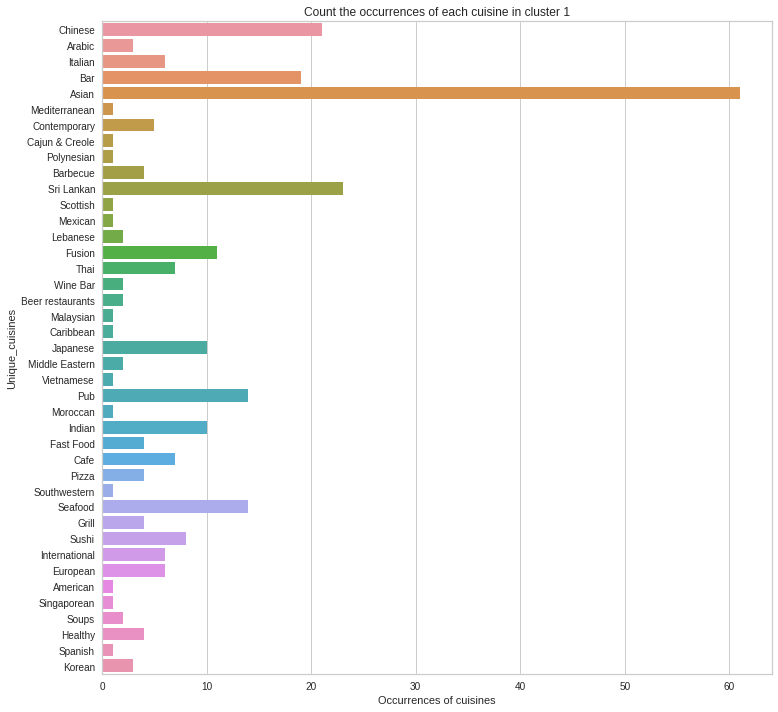

In [ ]:
# Count the occurrences of each cuisine in cluster 1
cuisine_count = count(unique1_cuisines,'CUISINES',df1_kmeans)
# Create a dataframe for count & unique1_cuisines
df1_cuisines = pd.DataFrame()
df1_cuisines['unique_cuisines'] = unique1_cuisines
df1_cuisines['cuisine_count'] = cuisine_count
plt.figure(figsize=(12,12))
sns.barplot(x='cuisine_count',y='unique_cuisines',data = df1_cuisines)
plt.title('Count the occurrences of each cuisine in cluster 1')
plt.ylabel('Unique_cuisines')
plt.xlabel('Occurrences of cuisines')

>  **Frequency of unique cuisines in Cluster 2**

Text(0.5, 0, 'Occurrences of cuisines')

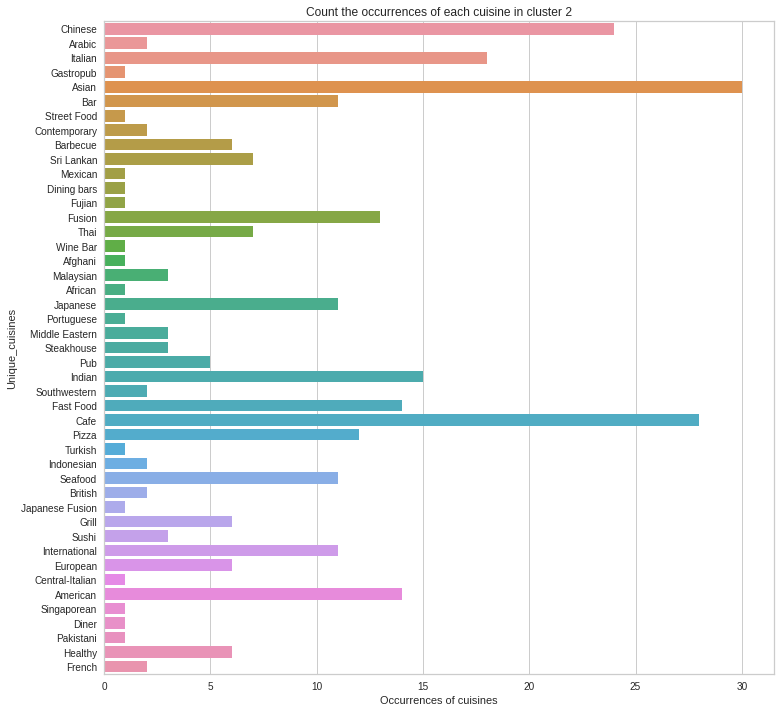

In [ ]:
# Count the occurrences of each cuisine in cluster 2
cuisine_count = count(unique2_cuisines,'CUISINES',df2_kmeans)
# Create a dataframe for count & unique2_cuisines
df2_cuisines = pd.DataFrame()
df2_cuisines['unique_cuisines'] = unique2_cuisines
df2_cuisines['cuisine_count'] = cuisine_count
plt.figure(figsize=(12,12))
sns.barplot(x='cuisine_count',y='unique_cuisines',data = df2_cuisines)
plt.title('Count the occurrences of each cuisine in cluster 2')
plt.ylabel('Unique_cuisines')
plt.xlabel('Occurrences of cuisines')

>  **Frequency of unique cuisines in Cluster 3**

Text(0.5, 0, 'Occurrences of cuisines')

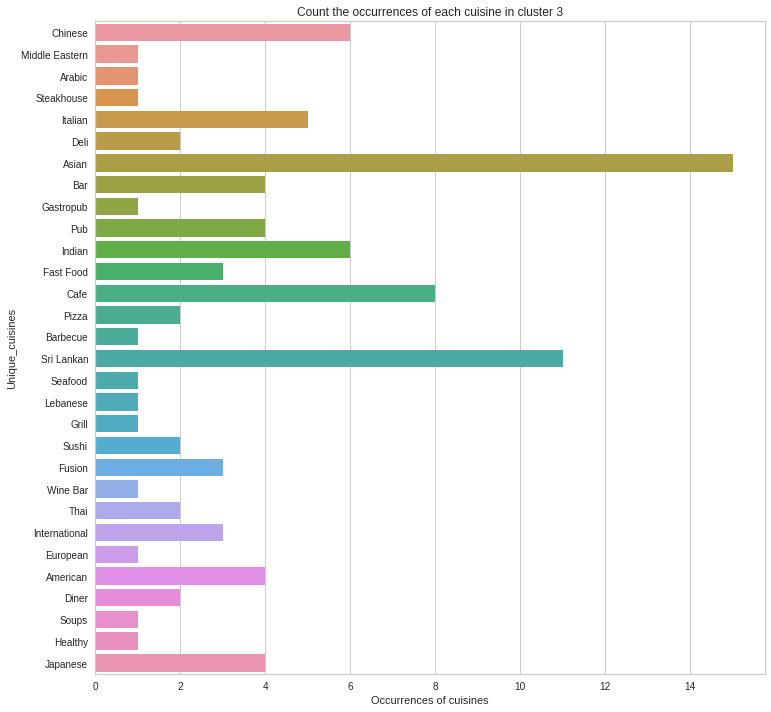

In [ ]:
# Count the occurrences of each cuisine in cluster 3
cuisine_count = count(unique3_cuisines,'CUISINES',df3_kmeans)
# Create a dataframe for count & unique3_cuisines
df3_cuisines = pd.DataFrame()
df3_cuisines['unique_cuisines'] = unique3_cuisines
df3_cuisines['cuisine_count'] = cuisine_count
plt.figure(figsize=(12,12))
sns.barplot(x='cuisine_count',y='unique_cuisines',data = df3_cuisines)
plt.title('Count the occurrences of each cuisine in cluster 3')
plt.ylabel('Unique_cuisines')
plt.xlabel('Occurrences of cuisines')

>  **Frequency of unique cuisines in Cluster 4**

Text(0.5, 0, 'Occurrences of cuisines')

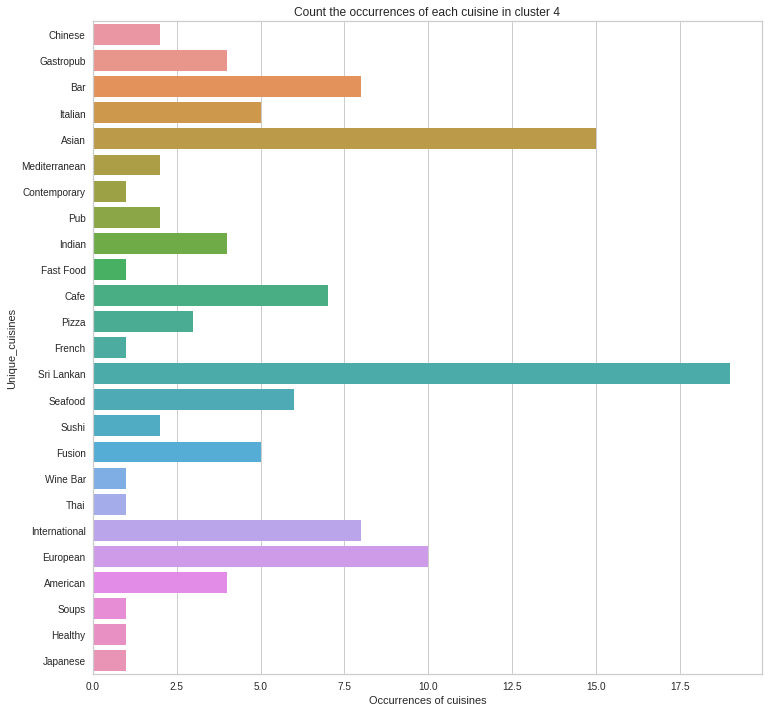

In [ ]:
# Count the occurrences of each cuisine in cluster 4
cuisine_count = count(unique4_cuisines,'CUISINES',df4_kmeans)
# Create a dataframe for count & unique4_cuisines
df4_cuisines = pd.DataFrame()
df4_cuisines['unique_cuisines'] = unique4_cuisines
df4_cuisines['cuisine_count'] = cuisine_count
plt.figure(figsize=(12,12))
ax = sns.barplot(x='cuisine_count',y='unique_cuisines',data = df4_cuisines)
plt.title('Count the occurrences of each cuisine in cluster 4')
plt.ylabel('Unique_cuisines')
plt.xlabel('Occurrences of cuisines')

> **Frequency of unique cuisines in Cluster 5**

Text(0.5, 0, 'Occurrences of cuisines')

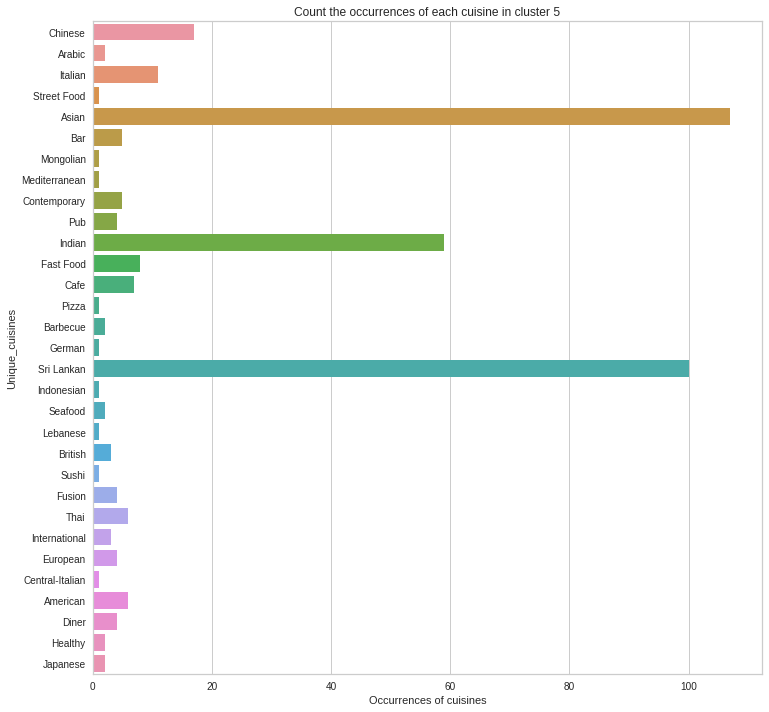

In [ ]:
# Count the occurrences of each cuisine in cluster 5
cuisine_count = count(unique5_cuisines,'CUISINES',df5_kmeans)
# Create a dataframe for count & unique4_cuisines
df5_cuisines = pd.DataFrame()
df5_cuisines['unique_cuisines'] = unique5_cuisines
df5_cuisines['cuisine_count'] = cuisine_count
plt.figure(figsize=(12,12))
sns.barplot(x='cuisine_count',y='unique_cuisines',data = df5_cuisines)
plt.title('Count the occurrences of each cuisine in cluster 5')
plt.ylabel('Unique_cuisines')
plt.xlabel('Occurrences of cuisines')

>  **Frequency of unique cuisines in Cluster 6**

Text(0.5, 0, 'Occurrences of cuisines')

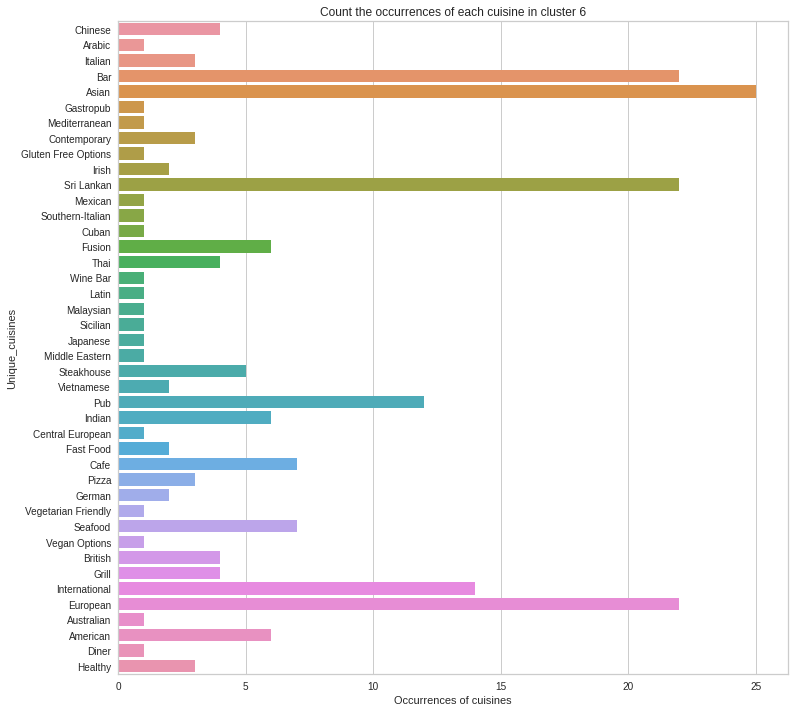

In [ ]:
# Count the occurrences of each cuisine in cluster 6
cuisine_count = count(unique6_cuisines,'CUISINES',df6_kmeans)
# Create a dataframe for count & unique4_cuisines
df6_cuisines = pd.DataFrame()
df6_cuisines['unique_cuisines'] = unique6_cuisines
df6_cuisines['cuisine_count'] = cuisine_count
plt.figure(figsize=(12,12))
sns.barplot(x='cuisine_count',y='unique_cuisines',data = df6_cuisines)
plt.title('Count the occurrences of each cuisine in cluster 6')
plt.ylabel('Unique_cuisines')
plt.xlabel('Occurrences of cuisines')

> **Frequency of unique items in SPECIAL DIETS**

>  **Frequency of unique SPECIAL DIETS in Cluster 1**

Text(0.5, 0, 'Occurrences of SPECIAL_DIETS')

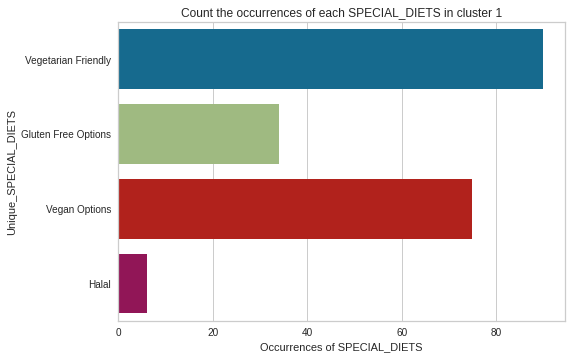

In [ ]:
# Count the occurrences of each SPECIAL DIETS in cluster 1
SPECIAL_DIETS_count = count(unique1_SPECIAL_DIETS,'SPECIAL DIETS',df1_kmeans)
# Create a dataframe for count & unique1_SPECIAL DIETS
df1_SPECIAL_DIETS = pd.DataFrame()
df1_SPECIAL_DIETS['unique_SPECIAL_DIETS'] = unique1_SPECIAL_DIETS
df1_SPECIAL_DIETS['SPECIAL_DIETS_count'] = SPECIAL_DIETS_count
sns.barplot(x='SPECIAL_DIETS_count',y='unique_SPECIAL_DIETS',data = df1_SPECIAL_DIETS)
plt.title('Count the occurrences of each SPECIAL_DIETS in cluster 1')
plt.ylabel('Unique_SPECIAL_DIETS')
plt.xlabel('Occurrences of SPECIAL_DIETS')

> **Frequency of unique SPECIAL DIETS in Cluster 2**

Text(0.5, 0, 'Occurrences of SPECIAL_DIETS')

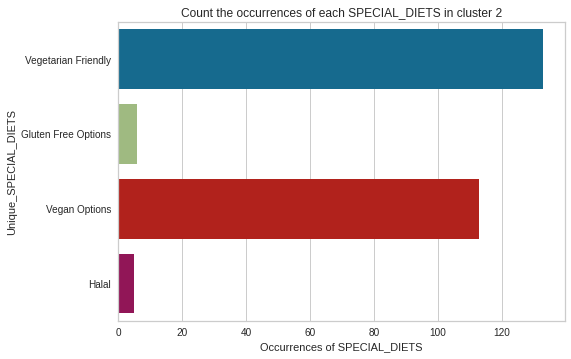

In [ ]:
# Count the occurrences of each SPECIAL DIETS in cluster 1
SPECIAL_DIETS_count = count(unique2_SPECIAL_DIETS,'SPECIAL DIETS',df2_kmeans)
# Create a dataframe for count & unique2_SPECIAL DIETS
df2_SPECIAL_DIETS = pd.DataFrame()
df2_SPECIAL_DIETS['unique_SPECIAL_DIETS'] = unique2_SPECIAL_DIETS
df2_SPECIAL_DIETS['SPECIAL_DIETS_count'] = SPECIAL_DIETS_count
sns.barplot(x='SPECIAL_DIETS_count',y='unique_SPECIAL_DIETS',data = df2_SPECIAL_DIETS)
plt.title('Count the occurrences of each SPECIAL_DIETS in cluster 2')
plt.ylabel('Unique_SPECIAL_DIETS')
plt.xlabel('Occurrences of SPECIAL_DIETS')

>  **Frequency of unique SPECIAL DIETS in Cluster 3**

Text(0.5, 0, 'Occurrences of SPECIAL_DIETS')

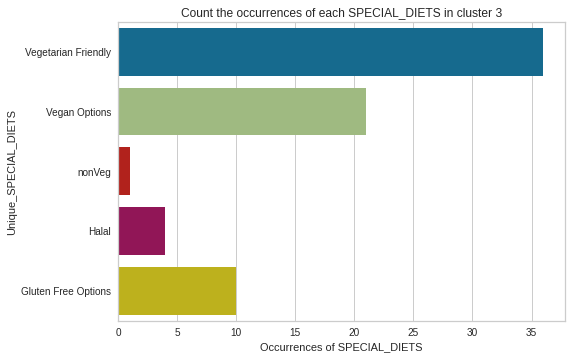

In [ ]:
# Count the occurrences of each cuisine in cluster 3
SPECIAL_DIETS_count = count(unique3_SPECIAL_DIETS,'SPECIAL DIETS',df3_kmeans)
# Create a dataframe for count & unique3_cuisines
df3_SPECIAL_DIETS = pd.DataFrame()
df3_SPECIAL_DIETS['unique_SPECIAL_DIETS'] = unique3_SPECIAL_DIETS
df3_SPECIAL_DIETS['SPECIAL_DIETS_count'] = SPECIAL_DIETS_count
sns.barplot(x='SPECIAL_DIETS_count',y='unique_SPECIAL_DIETS',data = df3_SPECIAL_DIETS)
plt.title('Count the occurrences of each SPECIAL_DIETS in cluster 3')
plt.ylabel('Unique_SPECIAL_DIETS')
plt.xlabel('Occurrences of SPECIAL_DIETS')

>  **Frequency of unique SPECIAL DIETS in Cluster 4**

Text(0.5, 0, 'Occurrences of SPECIAL_DIETS')

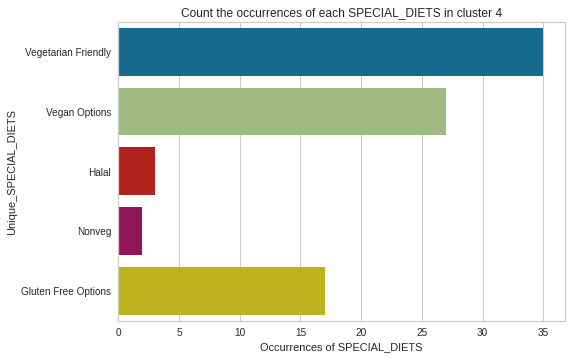

In [ ]:
# Count the occurrences of each SPECIAL DIETS in cluster 4
SPECIAL_DIETS_count = count(unique4_SPECIAL_DIETS,'SPECIAL DIETS',df4_kmeans)
# Create a dataframe for count & unique4_SPECIAL DIETS
df4_SPECIAL_DIETS = pd.DataFrame()
df4_SPECIAL_DIETS['unique_SPECIAL_DIETS'] = unique4_SPECIAL_DIETS
df4_SPECIAL_DIETS['SPECIAL_DIETS_count'] = SPECIAL_DIETS_count
sns.barplot(x='SPECIAL_DIETS_count',y='unique_SPECIAL_DIETS',data = df4_SPECIAL_DIETS)
plt.title('Count the occurrences of each SPECIAL_DIETS in cluster 4')
plt.ylabel('Unique_SPECIAL_DIETS')
plt.xlabel('Occurrences of SPECIAL_DIETS')

>  **Frequency of unique SPECIAL DIETS in Cluster 5**

Text(0.5, 0, 'Occurrences of SPECIAL_DIETS')

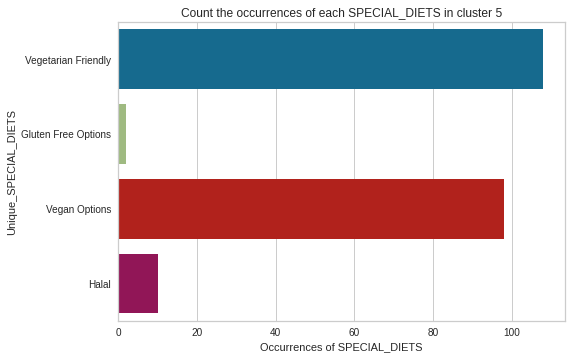

In [ ]:
# Count the occurrences of each SPECIAL DIETS in cluster 5
SPECIAL_DIETS_count = count(unique5_SPECIAL_DIETS,'SPECIAL DIETS',df5_kmeans)
# Create a dataframe for count & unique5_SPECIAL DIETS
df5_SPECIAL_DIETS = pd.DataFrame()
df5_SPECIAL_DIETS['unique_SPECIAL_DIETS'] = unique5_SPECIAL_DIETS
df5_SPECIAL_DIETS['SPECIAL_DIETS_count'] = SPECIAL_DIETS_count
sns.barplot(x='SPECIAL_DIETS_count',y='unique_SPECIAL_DIETS',data = df5_SPECIAL_DIETS)
plt.title('Count the occurrences of each SPECIAL_DIETS in cluster 5')
plt.ylabel('Unique_SPECIAL_DIETS')
plt.xlabel('Occurrences of SPECIAL_DIETS')

>  **Frequency of SPECIAL DIETS in Cluster 6**

Text(0.5, 0, 'Occurrences of items in SPECIAL_DIETS')

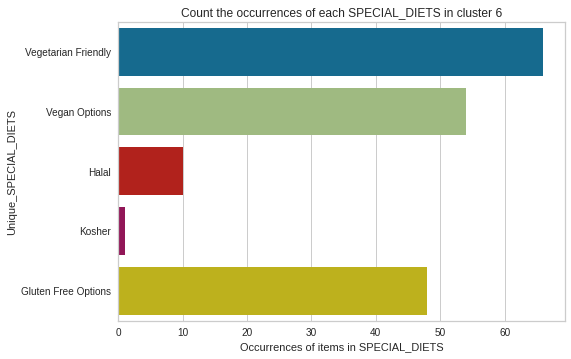

In [ ]:
# Count the occurrences of each SPECIAL DIETS in cluster 6
SPECIAL_DIETS_count = count(unique6_SPECIAL_DIETS,'SPECIAL DIETS',df6_kmeans)
# Create a dataframe for count & unique6_SPECIAL DIETS
df6_SPECIAL_DIETS = pd.DataFrame()
df6_SPECIAL_DIETS['unique_SPECIAL_DIETS'] = unique6_SPECIAL_DIETS
df6_SPECIAL_DIETS['SPECIAL_DIETS_count'] = SPECIAL_DIETS_count
sns.barplot(x='SPECIAL_DIETS_count',y='unique_SPECIAL_DIETS',data = df6_SPECIAL_DIETS)
plt.title('Count the occurrences of each SPECIAL_DIETS in cluster 6')
plt.ylabel('Unique_SPECIAL_DIETS')
plt.xlabel('Occurrences of items in SPECIAL_DIETS')

>  **Frequency of unique items in Meals**

>  **Frequency of unique items in Meals in Cluster 1**

Text(0.5, 0, 'Occurrences of items in Meals')

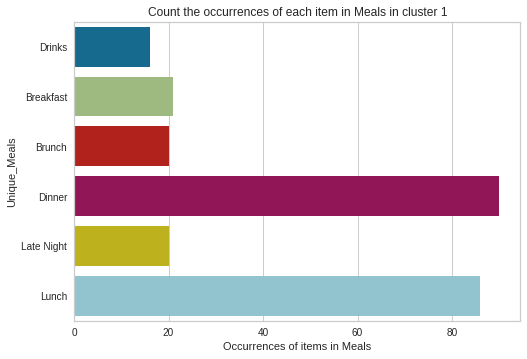

In [ ]:
# Count the occurrences of each Meals in cluster 1
meals_count = count(unique1_Meals,'Meals',df1_kmeans)
# Create a dataframe for count & unique1_Meals
df1_Meals = pd.DataFrame()
df1_Meals['unique_Meals'] = unique1_Meals
df1_Meals['Meals_count'] = meals_count
sns.barplot(x='Meals_count',y='unique_Meals',data = df1_Meals)
plt.title('Count the occurrences of each item in Meals in cluster 1')
plt.ylabel('Unique_Meals')
plt.xlabel('Occurrences of items in Meals')

>  **Frequency of unique items in Meals in Cluster 2**

Text(0.5, 0, 'Occurrences of items in Meals')

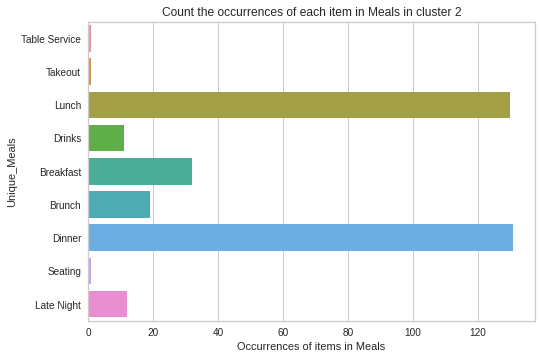

In [ ]:
# Count the occurrences of each Meals in cluster 2
meals_count = count(unique2_Meals,'Meals',df2_kmeans)
# Create a dataframe for count & unique2_Meals
df2_Meals = pd.DataFrame()
df2_Meals['unique_Meals'] = unique2_Meals
df2_Meals['Meals_count'] = meals_count
sns.barplot(x='Meals_count',y='unique_Meals',data = df2_Meals)
plt.title('Count the occurrences of each item in Meals in cluster 2')
plt.ylabel('Unique_Meals')
plt.xlabel('Occurrences of items in Meals')

>  **Frequency of unique items in Meals in Cluster 3**

Text(0.5, 0, 'Occurrences of items in Meals')

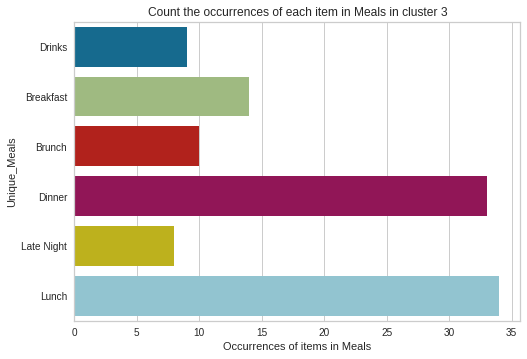

In [ ]:
# Count the occurrences of each Meals in cluster 3
meals_count = count(unique3_Meals,'Meals',df3_kmeans)
# Create a dataframe for count & unique3_Meals
df3_Meals = pd.DataFrame()
df3_Meals['unique_Meals'] = unique3_Meals
df3_Meals['Meals_count'] = meals_count
sns.barplot(x='Meals_count',y='unique_Meals',data = df3_Meals)
plt.title('Count the occurrences of each item in Meals in cluster 3')
plt.ylabel('Unique_Meals')
plt.xlabel('Occurrences of items in Meals')

>  **Frequency of unique items in Meals in Cluster 4**

Text(0.5, 0, 'Occurrences of items in Meals')

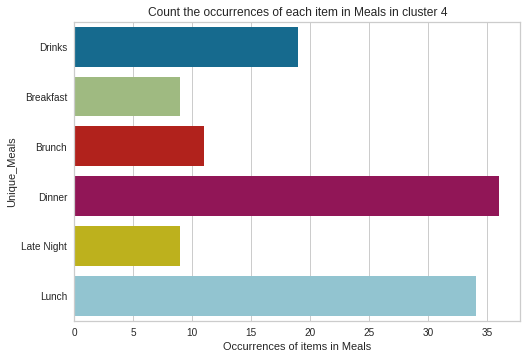

In [ ]:
# Count the occurrences of each item in Meals in cluster 4
meals_count = count(unique4_Meals,'Meals',df4_kmeans)
# Create a dataframe for count & unique4_Meals
df4_Meals = pd.DataFrame()
df4_Meals['unique_Meals'] = unique4_Meals
df4_Meals['Meals_count'] = meals_count
sns.barplot(x='Meals_count',y='unique_Meals',data = df4_Meals)
plt.title('Count the occurrences of each item in Meals in cluster 4')
plt.ylabel('Unique_Meals')
plt.xlabel('Occurrences of items in Meals')

>  **Frequency of unique items in Meals in Cluster 5**

Text(0.5, 0, 'Occurrences of items in Meals')

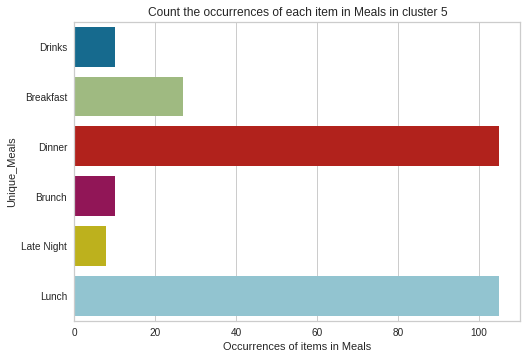

In [ ]:
# Count the occurrences of each item in Meals in cluster 5
meals_count = count(unique5_Meals,'Meals',df5_kmeans)
# Create a dataframe for count & unique5_Meals
df5_Meals = pd.DataFrame()
df5_Meals['unique_Meals'] = unique5_Meals
df5_Meals['Meals_count'] = meals_count
sns.barplot(x='Meals_count',y='unique_Meals',data = df5_Meals)
plt.title('Count the occurrences of each item in Meals in cluster 5')
plt.ylabel('Unique_Meals')
plt.xlabel('Occurrences of items in Meals')

>  **Frequency of unique items in Meals in Cluster 6**

Text(0.5, 0, 'Occurrences of items in Meals')

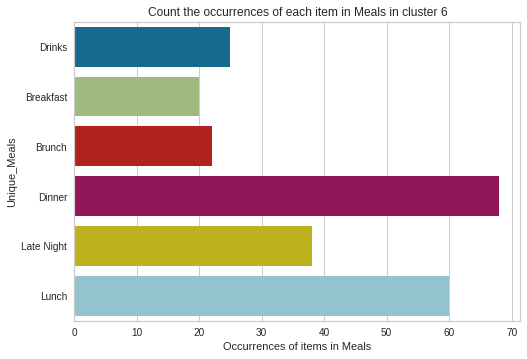

In [ ]:
# Count the occurrences of each item in Meals in cluster 6
meals_count = count(unique6_Meals,'Meals',df6_kmeans)
# Create a dataframe for count & unique6_Meals
df6_Meals = pd.DataFrame()
df6_Meals['unique_Meals'] = unique6_Meals
df6_Meals['Meals_count'] = meals_count
sns.barplot(x='Meals_count',y='unique_Meals',data = df6_Meals)
plt.title('Count the occurrences of each item in Meals in cluster 6')
plt.ylabel('Unique_Meals')
plt.xlabel('Occurrences of items in Meals')

>  **Frequency of unique items in FEATURES**

>  **Frequency of unique items in FEATURES in Cluster 1**

Text(0.5, 0, 'Occurrences of items in FEATURES')

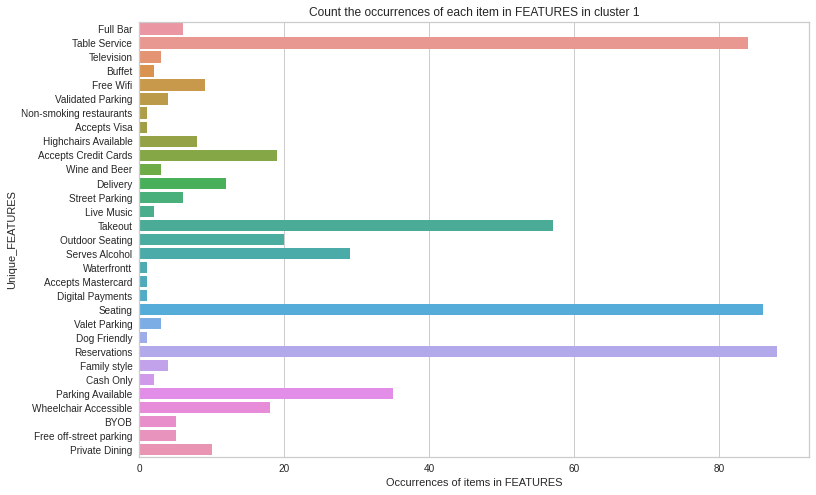

In [ ]:
# Count the occurrences of each item in FEATURES in cluster 1
FEATURES_count = count(unique1_FEATURES,'FEATURES',df1_kmeans)
# Create a dataframe for count & unique1_FEATURES
df1_FEATURES = pd.DataFrame()
df1_FEATURES['unique_FEATURES'] = unique1_FEATURES
df1_FEATURES['FEATURES_count'] = FEATURES_count
plt.figure(figsize=(12,8))
sns.barplot(x='FEATURES_count',y='unique_FEATURES',data = df1_FEATURES)
plt.title('Count the occurrences of each item in FEATURES in cluster 1')
plt.ylabel('Unique_FEATURES')
plt.xlabel('Occurrences of items in FEATURES')

>  **Frequency of unique items in FEATURES in Cluster 2**

Text(0.5, 0, 'Occurrences of items in FEATURES')

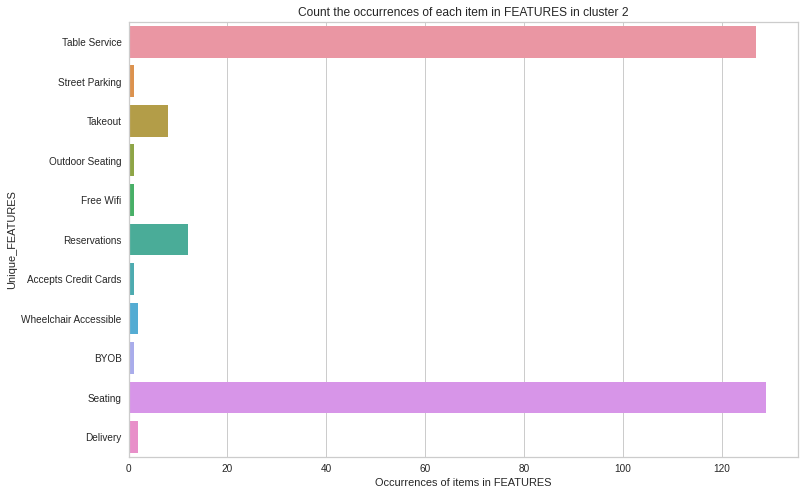

In [ ]:
# Count the occurrences of each item in FEATURES in cluster 2
FEATURES_count = count(unique2_FEATURES,'FEATURES',df2_kmeans)
# Create a dataframe for count & unique1_FEATURES
df2_FEATURES = pd.DataFrame()
df2_FEATURES['unique_FEATURES'] = unique2_FEATURES
df2_FEATURES['FEATURES_count'] = FEATURES_count
plt.figure(figsize=(12,8))
sns.barplot(x='FEATURES_count',y='unique_FEATURES',data = df2_FEATURES)
plt.title('Count the occurrences of each item in FEATURES in cluster 2')
plt.ylabel('Unique_FEATURES')
plt.xlabel('Occurrences of items in FEATURES')

>  **Frequency of unique items in FEATURES in Cluster 3**

Text(0.5, 0, 'Occurrences of items in FEATURES')

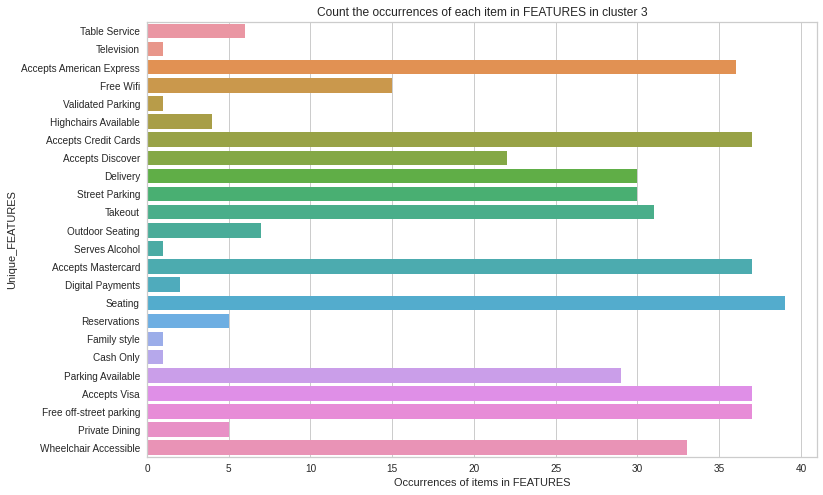

In [ ]:
# Count the occurrences of each item in FEATURES in cluster 3
FEATURES_count = count(unique3_FEATURES,'FEATURES',df3_kmeans)
# Create a dataframe for count & unique3_FEATURES
df3_FEATURES = pd.DataFrame()
df3_FEATURES['unique_FEATURES'] = unique3_FEATURES
df3_FEATURES['FEATURES_count'] = FEATURES_count
plt.figure(figsize=(12,8))
sns.barplot(x='FEATURES_count',y='unique_FEATURES',data = df3_FEATURES)
plt.title('Count the occurrences of each item in FEATURES in cluster 3')
plt.ylabel('Unique_FEATURES')
plt.xlabel('Occurrences of items in FEATURES')

>  **Frequency of unique items in FEATURES in Cluster 4**

Text(0.5, 0, 'Occurrences of items in FEATURES')

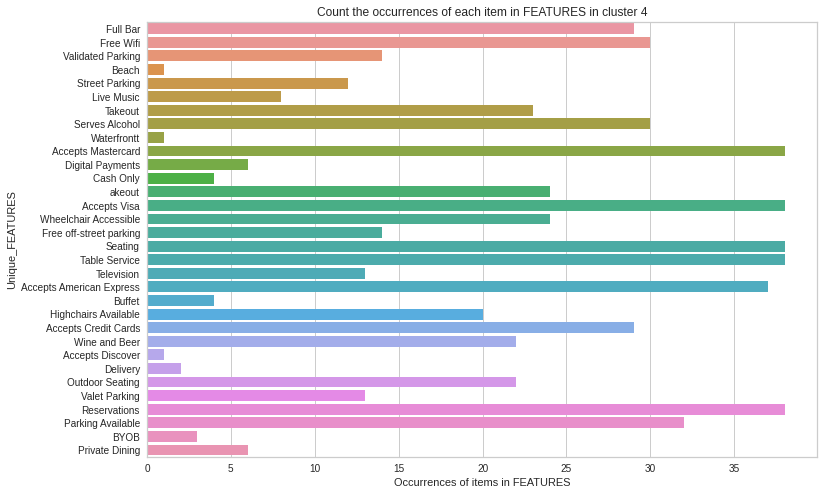

In [ ]:
# Count the occurrences of each item in FEATURES in cluster 4
FEATURES_count = count(unique4_FEATURES,'FEATURES',df4_kmeans)
# Create a dataframe for count & unique4_FEATURES
df4_FEATURES = pd.DataFrame()
df4_FEATURES['unique_FEATURES'] = unique4_FEATURES
df4_FEATURES['FEATURES_count'] = FEATURES_count
plt.figure(figsize=(12,8))
sns.barplot(x='FEATURES_count',y='unique_FEATURES',data = df4_FEATURES)
plt.title('Count the occurrences of each item in FEATURES in cluster 4')
plt.ylabel('Unique_FEATURES')
plt.xlabel('Occurrences of items in FEATURES')

>  **Frequency of unique items in FEATURES in Cluster 5**

Text(0.5, 0, 'Occurrences of items in FEATURES')

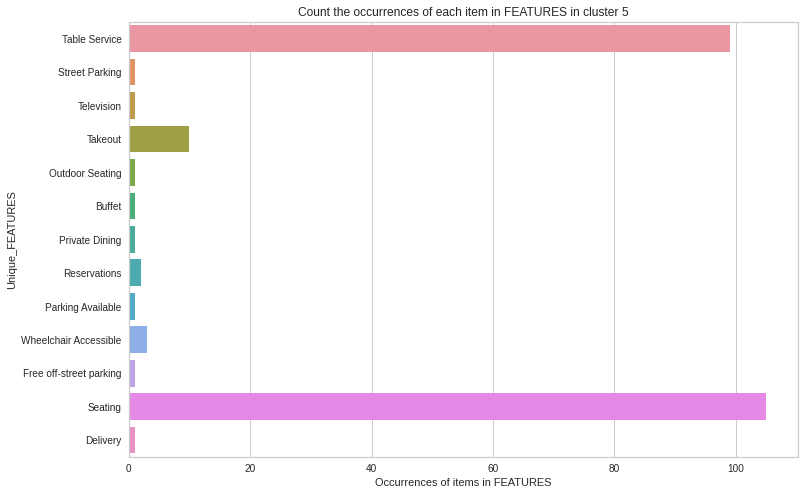

In [ ]:
# Count the occurrences of each item in FEATURES in cluster 5
FEATURES_count = count(unique5_FEATURES,'FEATURES',df5_kmeans)
# Create a dataframe for count & unique5_FEATURES
df5_FEATURES = pd.DataFrame()
df5_FEATURES['unique_FEATURES'] = unique5_FEATURES
df5_FEATURES['FEATURES_count'] = FEATURES_count
plt.figure(figsize=(12,8))
sns.barplot(x='FEATURES_count',y='unique_FEATURES',data = df5_FEATURES)
plt.title('Count the occurrences of each item in FEATURES in cluster 5')
plt.ylabel('Unique_FEATURES')
plt.xlabel('Occurrences of items in FEATURES')

>  **Frequency of unique items in FEATURES in Cluster 6**

Text(0.5, 0, 'Occurrences of items in FEATURES')

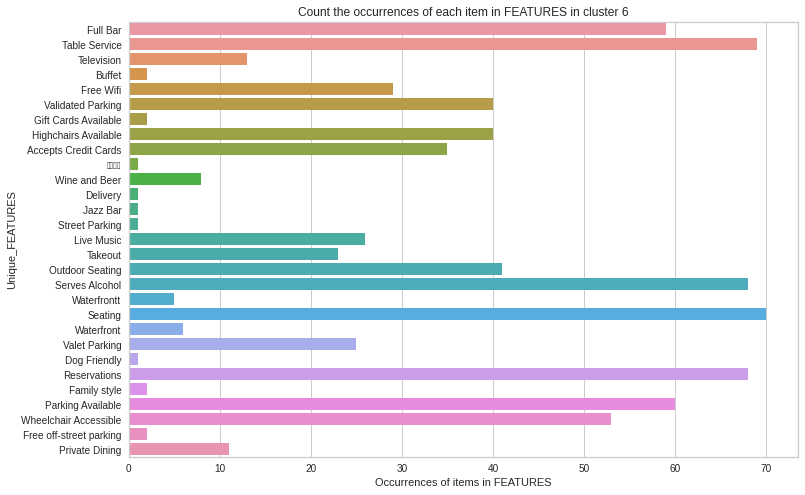

In [ ]:
# Count the occurrences of each item in FEATURES in cluster 6
FEATURES_count = count(unique6_FEATURES,'FEATURES',df6_kmeans)
# Create a dataframe for count & unique6_FEATURES
df6_FEATURES = pd.DataFrame()
df6_FEATURES['unique_FEATURES'] = unique6_FEATURES
df6_FEATURES['FEATURES_count'] = FEATURES_count
plt.figure(figsize=(12,8))
sns.barplot(x='FEATURES_count',y='unique_FEATURES',data = df6_FEATURES)
plt.title('Count the occurrences of each item in FEATURES in cluster 6')
plt.ylabel('Unique_FEATURES')
plt.xlabel('Occurrences of items in FEATURES')

## Restaurant maps for each cluster using Folium

>  **Here,we are creating folium maps which are centered around Colombo, Sri Lanka.**

> **Create a folium map centered around Colombo, Srilanka**

In [ ]:
# Geo co-ordinates for Colombo
lat_colombo = 6.9271
long_colombo =79.8612

Colombo_map=folium.Map(location=[lat_colombo,long_colombo],zoom_start=13)
folium.features.Marker(
(lat_colombo,long_colombo),
popup='Colombo, Capital of Sri Lanka',
icon=folium.Icon(color='red',icon_color='white',icon='male',angle=0,prefix='fa')).add_to(Colombo_map)
Colombo_map

In [ ]:
#Create a list of latitude & longitude pairs for all Restaurants in Cluster 1
location_c1=df1_kmeans[['Latitude','Longitude']]
locationlist_c1=location_c1.values.tolist()
locationlist_c1[0]

[6.8929346, 79.8639527]

> **Explore all Restaurants in cluster 1 around Colombo.**

In [ ]:

for point in range(0,len(locationlist_c1)):
    folium.features.Marker(
    locationlist_c1[point],
    popup=df1_kmeans['Name'][point]+', '+ df1_kmeans['CUISINES'][point]+', '+df1_kmeans['SPECIAL DIETS'][point],
    icon=folium.Icon(color='darkblue',icon_color='white',icon='male',angle=0,prefix='fa')
    ).add_to(Colombo_map)
Colombo_map

In [ ]:
#Create a list of latitude & longitude pairs for all Restaurants in Cluster 2
location_c2=df2_kmeans[['Latitude','Longitude']]
locationlist_c2=location_c2.values.tolist()
locationlist_c2[0]

[6.8664, 80.0166]

> **Explore all Restaurants in cluster 2 around Colombo.**

In [ ]:
for point in range(0,len(locationlist_c2)):
    folium.features.Marker(
    locationlist_c2[point],
    popup=df2_kmeans['Name'][point]+', '+ df2_kmeans['CUISINES'][point]+', '+df2_kmeans['SPECIAL DIETS'][point],
    icon=folium.Icon(color='darkblue',icon_color='white',icon='male',angle=0,prefix='fa')
    ).add_to(Colombo_map)
Colombo_map

In [ ]:
#Create a list of latitude & longitude pairs for all Restaurants in Cluster 3
location_c3=df3_kmeans[['Latitude','Longitude']]
locationlist_c3=location_c3.values.tolist()
locationlist_c3[0]

[6.9025873, 79.8588067]

> **Explore all Restaurants in cluster 3 around Colombo.**

In [ ]:
for point in range(0,len(locationlist_c3)):
    folium.features.Marker(
    locationlist_c3[point],
    popup=df3_kmeans['Name'][point]+', '+ df3_kmeans['CUISINES'][point]+', '+df3_kmeans['SPECIAL DIETS'][point],
    icon=folium.Icon(color='darkblue',icon_color='white',icon='male',angle=0,prefix='fa')
    ).add_to(Colombo_map)
Colombo_map

In [ ]:
#Create a list of latitude & longitude pairs for all Restaurants in Cluster 4
location_c4=df4_kmeans[['Latitude','Longitude']]
locationlist_c4=location_c4.values.tolist()
locationlist_c4[0]

[6.9167, 79.85]

> **Explore all Restaurants in cluster 4 around Colombo.**

In [ ]:
for point in range(0,len(locationlist_c4)):
    folium.features.Marker(
    locationlist_c4[point],
    popup=df4_kmeans['Name'][point]+', '+ df4_kmeans['CUISINES'][point]+', '+df4_kmeans['SPECIAL DIETS'][point],
    icon=folium.Icon(color='darkblue',icon_color='white',icon='male',angle=0,prefix='fa')
    ).add_to(Colombo_map)
Colombo_map

In [ ]:
#Create a list of latitude & longitude pairs for all Restaurants in Cluster 5
location_c5=df5_kmeans[['Latitude','Longitude']]
locationlist_c5=location_c5.values.tolist()
locationlist_c5[0]

[6.9075211, 79.850928]

> **Explore all Restaurants in cluster 5 around Colombo.**

In [ ]:
for point in range(0,len(locationlist_c5)):
    folium.features.Marker(
    locationlist_c5[point],
    popup=df5_kmeans['Name'][point]+', '+ df5_kmeans['CUISINES'][point]+', '+df5_kmeans['SPECIAL DIETS'][point],
    icon=folium.Icon(color='darkblue',icon_color='white',icon='male',angle=0,prefix='fa')
    ).add_to(Colombo_map)
Colombo_map

In [ ]:
#Create a list of latitude & longitude pairs for all Restaurants in Cluster 6
location_c6=df6_kmeans[['Latitude','Longitude']]
locationlist_c6=location_c6.values.tolist()
locationlist_c6[0]

[6.9203009, 79.846261]

> **Explore all Restaurants in cluster 6 around Colombo.**

In [ ]:
for point in range(0,len(locationlist_c6)):
    folium.features.Marker(
    locationlist_c6[point],
    popup=df6_kmeans['Name'][point]+', '+ df6_kmeans['CUISINES'][point]+', '+df6_kmeans['SPECIAL DIETS'][point],
    icon=folium.Icon(color='darkblue',icon_color='white',icon='male',angle=0,prefix='fa')
    ).add_to(Colombo_map)
Colombo_map

## Characterstics of each Cluster

> **Some characteristics are unique (shown in bold & italic letters) & some are common among all clusers. Here the order in which the CUISINES, SPECIAL DIETS, Meals, & FEATURES are mentioned is descending based on their occurrencies in respective clusters. High occurrencies of items in CUISINES, SPECIAL DIETS, Meals, & FEATURES are only considered for each cluster.**

## Cluster 1

* CUISINES : Asian, Bar, Sri Lankan, Chinise, Pub, Fusion, Indian, Seafood, Japanese.

* SPECIAL DIETS : Vegetarian Friendly, Vegan options, Gluten Free options, Halal.

* Meals : Lunch, Dinner.

* FEATURES : Reservations, Seating, Table service, Takeout, Parking available, Serves Alcohol, Outdoor seating, Accepts Credit cards, Wheelchair Accessible.

## Cluster 2

* CUISINES : Asian, Cafe, ***Pizza***, Seafood, International, Bar, Japanese, Fusion,Indian, American, Italian, Sri Lankan, Chinise, ***Thai***.

* SPECIAL DIETS : Vegetarian Friendly, Vegan options.

* Meals : Lunch, Dinner, Breakfast.

* FEATURES : Table service, Seating.

## Cluster 3

* CUISINES : Asian, Sri Lankan, Cafe, Indian, Chinise, Italian, Japanese, Bar, American, Pub.

* SPECIAL DIETS : Vegetarian Friendly, Vegan options, Gluten Free options, Halal, non-veg.

* Meals : Lunch, Dinner, Breakfast

* FEATURES : Seating, Accepts credit cards, Accepts American express, Free off-street parking, Accepts Mastercard, Accepts Visa, Take out, ***Delivery***, Wheelchair Accessible, Accepts Discover, Free Wifi. 

## Cluster 4

* CUISINES : Sri Lankan, European, Asian, ***Gastropub***, Bar, International, Seafood, Cafe, Fusion, Indian, Italian.

* SPECIAL DIETS : Vegetarian Friendly, Vegan options, Gluten Free options, Halal, Non-veg.

* Meals : Lunch, Dinner, ***Drinks***.

* FEATURES : Reservations, Seating, Table service, Accepts Visa, Accepts American express, Accepts Master card, Parking available, Serves Alcohol, Free wifi, Full bar, Accepts Credit cards, Take out, Wheelchair accessible, Outdoor seating, Wine & Beer, ***Television***, Street parking, Valet parking, Validated Parking.

## Cluster 5

* CUISINES : Asian, Sri Lankan, Bar, Indian, Chinise.

* SPECIAL DIETS : Vegetarian Friendly, Vegan options.

* Meals : Lunch, Dinner, Breakfast.

* FEATURES : Table service, Seating, Take out.

## Cluster 6

* CUISINES : Asian, European, Sri Lankan, Bar, International, Pub, ***Steakhouse***, Seafood, Cafe, Fusion, Indian, American.

* SPECIAL DIETS : Vegetarian Friendly, Vegan options, Gluten Free options, Halal, ***Kosher***.

* Meals : Lunch, Dinner, ***Late Night***.

* FEATURES : Seating, Table service, Reservations, Serves Alcohol,Parking available, Full bar, Wheelchair Accessible, Outdoor seating, ***Highchairs available***, Validated Parking, Accepts Credit cards, Free wifi, ***Live Music***, Valet parking, Take out.